# Métodos numéricos para Shallow Water Equations 1D e aplicações em dinâmica atmosférica

---

**Como entregar:** Enviar o seu jupyter notebook (.ipynb) pelo próprio Classroom.


**Leia com atenção:**


*   Os exercícios que valem nota estão todos marcados uma exclamação❗.
*   Atividades marcadas com 🧩 são opcionais.
*   Use o Google Colab para executar o notebook e fazer a tarefa, ou baixe no seu computador e faça na API que preferir, mas lembre-se de entregar no Classroom a versão final.
*   Há questões dissertativas e questões computacionais! Responda com códigos e texto, nos campos indicados.
*   Entregue o notebook completo, com todo conteúdo original e mais os seus códigos e textos.
*   ❗Exercício 00:❗ Para mostrar que você leu até aqui, escreva seu nome completo (assinatura) na linha a seguir:




*Assinatura:*



---



## Preliminares

In [ ]:
import numpy as np                  #Numpy
import matplotlib.pyplot as plt     # Gráficos/figuras
import matplotlib.colors
from prettytable import PrettyTable #Tabelas mais bonitinhas



---





Parte teórica:
- Vallis, Geoffrey K. Atmospheric and oceanic fluid dynamics. Cambridge University Press, 2017.
- Durran, Dale R. Numerical methods for fluid dynamics: With applications to geophysics. Vol. 32. Springer Science & Business Media, 2010.
- Isla Simpson. Lecture Notes on Atmospheric Dynamics, 2010. https://staff.cgd.ucar.edu/islas/teaching/PHY2504HS.html (https://staff.cgd.ucar.edu/islas/teaching/4_Shallow_water.pdf)
- Dave Randall. Lecture Notes 2006. https://hogback.atmos.colostate.edu/group/dave/pdf/ShallowWater.pdf

Parte aplicada/numérica:
- Sadourny, Robert. "The dynamics of finite-difference models of the shallow-water equations." Journal of Atmospheric Sciences 32, no. 4 (1975): 680-689.
- Randall, David A. "Geostrophic adjustment and the finite-difference shallow-water equations." Monthly Weather Review 122, no. 6 (1994): 1371-1377.




---



## Introdução e Motivação

As equações da dinâmica atmosférica são, essencialmente, equações de dinâmica de fluidos na esfera em rotação. A dinâmica horizontal, sob certas hipóteses, pode ser expressa por equações muito mais simples que as 3D, constituindo as chamadas equações de águas rasas (Shallow Water Equations). Geralmente, os núcleos dinâmicos de modelos completos começam a partir desse tipo de equações, ou mais ainda, são formados por diversas camadas de águas rasas. Essas equações também são um protótipo ideal para testar métodos numéricos.

Nesta aula vamos trabalhar com uma versão 1D dessas equações, mas em breve as veremos em 2D e depois na esfera.


## 3D Primitive Equations

Vamos dar uma brevíssima introdução a dedução das equações. Vamos seguir o que está descrito nos capítulos 1, 2 e 3 do Livro do Vallis (2017).

Primeiro, mencionamos, sem deduzir, as equações primitivas. Estas são equações básicas para modelar a atmosfera ou o oceano (são as equações usadas pelo Richardson, lá em 1922, nos primórdios da previsão do tempo). Elas são essencialmente derivadas a partir da 2a lei de Newton ($F=ma$) para um volume infinitesimal, mas considerando um referencial em rotação.


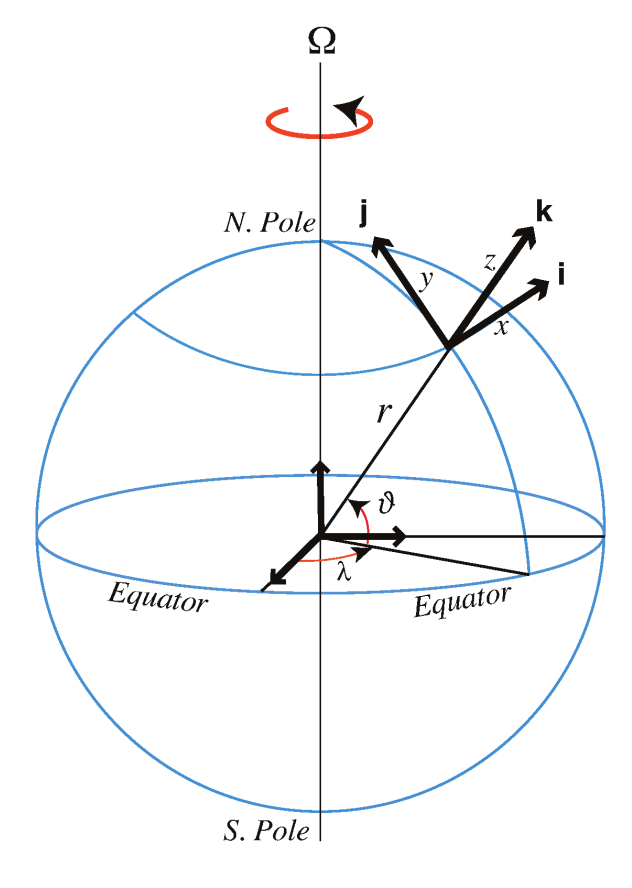


Para essas equações, assumimos que a atmosfera/oceano está em equilibrio hidrostático, isto é, a pressão atmosférica ($p$) está em balanço de forças com a gravidade ($g$). Na prática, isso implica que
$$
\frac{\partial p}{\partial z}=-\rho g,  \,\text{ (Hydrostatic)}
$$
onde $ρ$ é a desnidade do ar, $g$ é aceleração da gravidade e $z$ a coordenada vertical (no sentido radial em relação à esfera). Com isso, a advecção/aceleração de velocidade vertical dos ventos é desprezada.

A velocidade horizontal dos ventos (para $\mathbf{u}=(u,v,0)$) é regida pela equação do momento (deduzida a partir da 2a lei de Newton)
$$
 \frac{D \mathbf{u}}{Dt}+ \boldsymbol{ f } \times \mathbf{u} = - \frac{1}{\rho} \nabla_H p  \,\text{ (Momentum)}
 $$
 onde
* $\mathbf{u}=(u,v,0)$: velocidade dos ventos horizontais
* $D/Dt=\partial/\partial t + \mathbf{u}\cdot \nabla $: derivada material/total
*  $
\nabla_{H}  =(\partial_x , \partial_y, 0 )
$ : Gradiente horizontal
* $\mathbf{f} = f \mathbf{k}$: Termo de Coriolis (leva em conta a rotação da Terra, e está direcionado radialmente), onde $f=2\Omega \sin \theta $, com $\Omega$ sendo a velocidade angular de rotação da Terra e $\theta$ a latitude.
* $\mathbf{k}\times\mathbf{v}$ : Produto cruzado entre $\mathbf{k}$ e $\mathbf{v}$ (rotate $\mathbf{v}$ ccw 90 degrees).
* $\mathbf{k}\times (u,v, 0)= (-v, u, 0)$

Adicionalmente, temos uma equação de conservação de massa,
$$
 \frac{\partial \rho}{\partial t}   =  -\nabla \cdot (\rho \mathbf{v}) \,\text{ (Continuity)},
$$
onde
* $\mathbf{v}=(u,v,w)$: velocidade dos ventos em 3D
* $\nabla \cdot  =(\partial_x , \partial_y, \partial_y ) \cdot $ : Divergente total

Note que a densidade é essencialmente modelada no tempo a partir do divergente (convergência, neste caso) de fluxo.

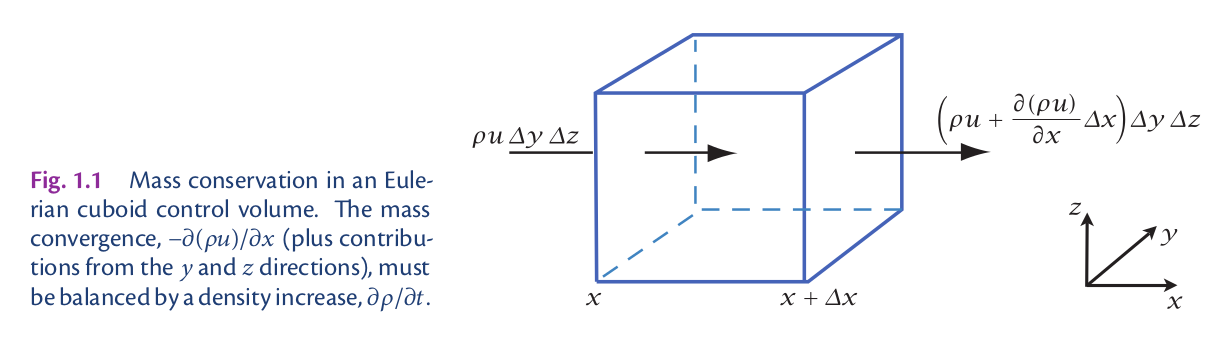

Vamos omitir a parte termodinâmica das equações primitivas, por hora, mas elas serão importantes para o caso 3D.

## Shallow Water Equations


A ideia central agora é integrar as equações 3D na direção $z$ e obter uma aproximação para a dinâmica horizontal. Começamos assumindo que a desidade do ar é constante ($\rho=\rho_0$).

Agora assumimos que o fluido tem uma altura $h$ variando em relação a uma altura de referência $H$, constante, e definimos $\eta$ como uma medida de altura livre, variável, conforme indicado na figura abaixo.

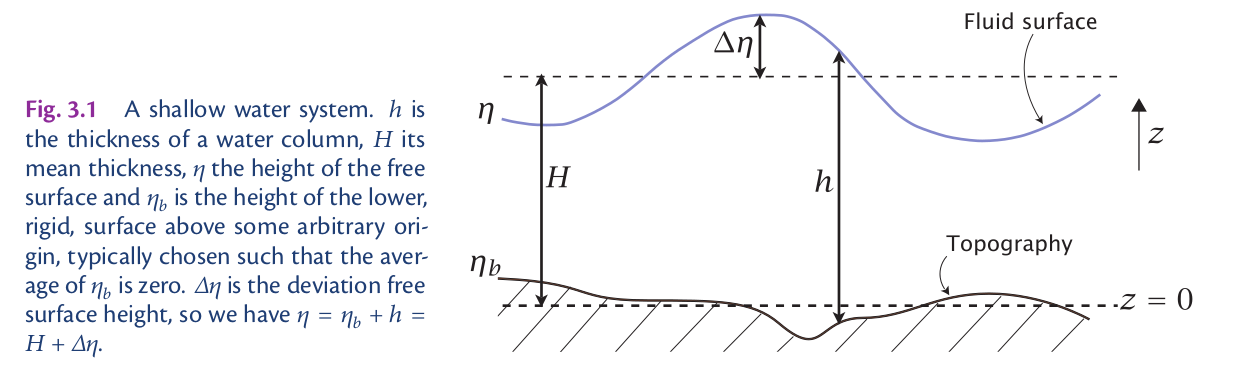



Integrando a equação do balanço hidrostático entre um $z$ qualquer e o topo do fluido $z=\eta$, temos que (abusando um pouco da notação!)

$$\int_{z}^{\eta}\frac{\partial p}{\partial z}=-\int_{z}^{\eta}\rho_0 g dz$$
$$\underbrace{p(t, x, y, \eta )}_{\text{Constante $\approx 0$}} - p(t, x, y, z ) = - \rho_0 g (\eta(t,x,y)-z),$$
logo,
$$p(t, x, y, z ) = \rho_0 g (\eta(t,x,y)-z)$$

Por sua vez, o gradiente horizontal (em $(x,y)$) da pressão será dado por
$$
\nabla_{H}p=\rho_0 g\nabla_{H}\eta
$$
onde
$$
\nabla_{H}  =(\partial_x , \partial_y ) .
$$

Na prática, isso significa que podemos trocar o gradiente de pressão por um gradiente da altura da fluido!



Com isso, as equações de momento horizontal, em $(x,y)$, com ($\vec{v}=(u,v)$), ficam da seguinte forma

$$ \frac{\partial \vec{v}}{\partial t} + \underbrace{(\vec{v}\cdot\nabla_H)\vec{v}}_{\text{nonlinear advection}} = \underbrace{-f \vec{k}\times \vec{v}}_{\text{Coriolis}}\,\,- \,\,\underbrace{g\nabla_H (h +\eta_b)}_{\text{Pressure}}, $$

onde usamos que a altura $\eta = h + \eta_b$, onde $h$ é a altura total do fluido (a ser encontrada) e $\eta_b$ a altura da topografia (conhecida).



Assumindo que a densidade é constante, temos que
$$ \frac{\partial \rho}{\partial t} = 0 $$
logo
$$\nabla \cdot (\vec{v}\rho)     = 0 $$
e portanto
$$\nabla\cdot \vec{v} =0, \quad (\rho=\rho_0), $$
que é equivalente a dizer que o fluido é incompressível em 3D.



Então, temos que

$$\nabla\cdot \vec{v} = \partial_xu+\partial_yv+\partial_zw   = 0,  $$

$$\partial_zw = -\partial_xu-\partial_yv $$

Integrando essa equação em $z$ entre $\eta_b$ e $\eta$, e usando que o lado direito não depende de $z$, temos que
$$\int_{\eta_b}^{\eta}\partial_zwdz = -\int_{\eta_b}^{\eta}(\partial_xu+\partial_yv)dz$$

$$w(t, x, y, \eta)-w(t, x, y, \eta_b) = -(\eta-\eta_b)\nabla_H\cdot\vec{v}$$

A superfície livre $\eta$ deve ter velocidade $w$,

$$\frac{D\eta }{Dt}=w(t, x,y,\eta)$$

Analogamente, a altura da topografia $\eta_b$ deve ter vecidade vertical

$$\frac{D\eta_b}{Dt}=w(t, x,y,\eta_b) ,$$
mas como não pode haver movimentação da topografia ($\frac{\partial \eta_b}{\partial t}=0$), então temos que

$$\frac{D\eta_b }{Dt}=\underbrace{\frac{\partial\eta_b}{\partial t}}_{\text{=0}} + \vec{v}\cdot \nabla \eta_b = w(t, x,y,\eta_b).$$

Juntando as equações, temos que
$$
\frac{D\eta }{Dt}-\frac{D\eta_b }{Dt} = -(\eta-\eta_b)\nabla_H\cdot\vec{v}
$$

$$
\frac{D\eta }{Dt}-\vec{v}\cdot \nabla \eta_b = -(\eta-\eta_b)\nabla_H\cdot\vec{v}
$$

$$
\frac{\partial \eta }{\partial t}+ \vec{v}\cdot \nabla (\eta - \eta_b) = -(\eta-\eta_b)\nabla_H\cdot\vec{v}
$$

$$
\frac{\partial h }{\partial t}+ \vec{v}\cdot \nabla h = -h \nabla_H\cdot\vec{v}.
$$

Por fim,
$$
\frac{\partial h }{\partial t} = - \nabla_H\cdot (h\vec{v}).
$$





---

### Forma Euleriana

> Equações de águas rasas (assumindo operadores sempre horizontais)
$$
\frac{\partial h }{\partial t} = - \nabla\cdot (h\vec{v}), \quad \text{(Continuidade)}
$$
$$ \frac{\partial \vec{v}}{\partial t} + (\vec{v}\cdot\nabla)\vec{v} = -f \vec{k}\times \vec{v}- g\nabla (h +\eta_b), \quad \text{(Momento)}$$






---



### Forma de Vetor Invariante

Split nonlinear advection ($\vec{v}=(u,v)$):

$$ (\vec{v}\cdot\nabla)\vec{v} = (\nabla \times \vec{v})\times \vec{v} + \frac{1}{2}\nabla \left( \vec{v}\cdot\vec{v}\right)  $$

Relative and absolute  vorticities:
$$\zeta = \vec{k}\cdot(\nabla\times\vec{v}) = (\partial_xv-\partial_yu), \quad\quad \omega_a = \zeta+f $$

Kinetic energy:
$$ K= \frac{1}{2} \left( \vec{v}\cdot\vec{v}\right) = \frac{1}{2}(u^2+v^2)$$

Bernoulli potential:
$$B=K+g(h+\eta_b)$$

> SWE na forma de Vetor Invariante:
$$ \frac{\partial \vec{v}}{\partial t} + \omega_a \vec{k}\times \vec{u} =-\nabla B$$

🧩 *Exercise*: Show that the equations are equivalent!

Explicitly include the potential vorticity:
$$q=\omega_a/h$$
into SWE:
> $$ \frac{\partial h }{\partial t} + \nabla \cdot(h\vec{v})=0$$
$$ \frac{\partial \vec{v}}{\partial t} + q \vec{k}\times (h\vec{v}) =-\nabla B $$

### Propriedades

* Energia:
$$
E=(h\vec{v}\cdot\vec{v}+gh^2)/2
$$
Fluxo de Energia:
$$
\mathbf{F}=\vec{v}(h\vec{v}\cdot\vec{v}/2+gh^2)
$$
Conservação de energia:
$$
\frac{\partial E}{\partial t}=-\nabla \cdot \mathbf{F}
$$
* Vorticidade Potencial:
$$
\frac{Dq}{Dt}=0
$$
* Ondas de gravidade e Rossby



---





## 1D SWE

Como estamos indo passo a passo, vamos aqui ficar restritos a um modelo 1D de SWE. Para tanto, vamos simplesmente asusmir que cada uma das variáveis não depende de $y$, mas somente de $(t,x)$. Assim, todas as derivadas parciais em $y$ serão desconsideradas do sistema.

Vejamos:
* $h=h(t,x)$
* $\vec{v}=(u(t,x), v(t,x))$
* $\nabla = (\partial_x, 0)$
* $\nabla \cdot \vec{v} = \partial_xu$

SWE (Euleriano 1D):

> $$
\frac{\partial h }{\partial t} = - \frac{\partial (h u) }{\partial x} ,
$$
$$ \frac{\partial u}{\partial t} + u\frac{\partial  u }{\partial x} - f v  = - g\frac{\partial  (h +\eta_b) }{\partial x} ,$$
$$ \frac{\partial v}{\partial t} + u\frac{\partial  v }{\partial x} + f u  = 0 ,$$

Vamos querer imitar o que é feito no MPAS, portanto vamos usar uma formulação de vetor invariante. Neste caso temos, usando as expressões da vorticidade potencial, temos:


$$ \zeta = v_x, $$

$$ \omega_a = \zeta + f,$$

$$q=\omega_a/h = \frac{v_x+f}{h},$$

SWE (vetor invariante 1D):

>$$ \frac{\partial h }{\partial t} = - \frac{\partial (h u) }{\partial x}$$
$$ \frac{\partial u}{\partial t}  - q hv  = - \frac{\partial  (g(h +\eta_b) + K)}{\partial x} ,$$
$$ \frac{\partial v}{\partial t} + q h u  = 0 .$$

👉 Verifique são as mesmas equações que antes! Essa é só uma outra forma de escrevê-las!

👉 Curiosidade: Note que ao abrir a equação de $u$ explicitamente nas derivadas teremos:

$$ \frac{\partial u}{\partial t}  - \frac{(\partial_x v + f)}{h} hv  = - g\frac{\partial  (h +\eta_b)}{\partial x} - \frac{1}{2}\frac{\partial (u^2 )}{\partial x} -\frac{1}{2}\frac{\partial  (v ^2) }{\partial x} ,$$


$$ \frac{\partial u}{\partial t}  \color{red}{- v \frac{\partial v}{\partial x}} - fv   = - g\frac{\partial  (h +\eta_b)}{\partial x} - u\frac{\partial u }{\partial x} \color{red}{-v\frac{\partial  v }{\partial x} },$$

Os termos em vermelho se cancelam e recuperamos a equação na forma Euleriana usual. Mas será que os métodos numéricos fazem esse cancelamento também? Essa falha de cancelamento é uma das componentes responsáveis por instabilidades quando usamos essa formulação das equações.






---



## SWE Lineares

Para facilitar um pouco mais, vamos considerar uma linearização dessa equação, em torno de um estado básico em repouso ($\vec{v}=0$ e altura constante $h=\bar{h}$, para um $\bar{h}$ constante). Neste caso chegamos no seguinte conjunto de equações:


$$
\frac{\partial h }{\partial t} = - \bar{h}\frac{\partial u }{\partial x} ,
$$


$$ \frac{\partial u}{\partial t}  - f v  = - g\frac{\partial  (h +\eta_b)}{\partial x} ,$$
$$ \frac{\partial v}{\partial t} + f u  = 0 .$$


Vamos começar resolvendo numericamente essas equações!



---



### Método Numérico

Nossa filosofia será como a da equação de advecção, quando usamos volumes finitos, mas agora temos um sistema. Vejamos a seguir um método possível para o seguinte sistema de equações:

$$
\frac{\partial h }{\partial t} = - \frac{\partial (\bar{h} u) }{\partial x} ,
$$


$$ \frac{\partial u}{\partial t}  - f v  = - \frac{ \partial (g (h +\eta_b))}{\partial x} ,$$
$$ \frac{\partial v}{\partial t} + f u  = 0 .$$



Integrando agora em um volume de controle (nosso *Volume Finito*) no intervalo de tamanho $\Delta x$ centrado em $x_j$, $[x_{j-1/2}, x_{j+1/2}]$, com $x_{j+1/2}=(x_{j}+x_{j+1})/2$, $x_{j-1/2}=(x_{j}+x_{j-1})/2$, e dividindo pelo tamanho do intervalo ($\Delta x$) temos, para a continuidade
$$
\frac{\partial H_j(t)}{\partial t} = - \frac{1}{\Delta x}\int_{x_{j-1/2}}^{x_{j+1/2}} \frac{\partial \bar{h} u(t, x)}{\partial x}\, dx = - \frac{1}{\Delta x}\bar{h} (u(t, x_{j+1/2})-u(t, x_{j-1/2}))
$$
onde
$$
H_j(t)=\frac{1}{\Delta x}\int_{x_{j-1/2}}^{x_{j+1/2}} h(t, x)\, dx,
$$
é a altura média do fluido no Volume de Controle (nosso *Volume Finito*). Novamente, até aqui não há aproximação ainda, isto é, essa equação representa exatamente a variação da altura média do fluido no tempo.

Agora, se armazenarmos a altura do fluido nos pontos médios dos volumes ($x_j$) e as velocidades $u$ nos pontos médios entre os volumes (malha *staggered*/deslocada, do tipo C) nos pontos $ x_{j\pm 1/2}$, temos um seguinte método aproximado
$$
\frac{\partial h_j(t)}{\partial t} = - \frac{\bar{h}u_{j+1/2}(t)-\bar{h}u_{j-1/2}(t)}{\Delta x}
$$
onde assumimos que:
* $H_j(t) \approx h_j(t)$: A média é aproximada pelo valor pontual.
* $u_{j\pm 1/2}(t)$ são os valores pontuais de $u$ nesses pontos de interface entre volumes.

👉 Note a semelhança com o que vimos para a advecção na aula passada, e a representação dos fluxos $\bar{h}u$.

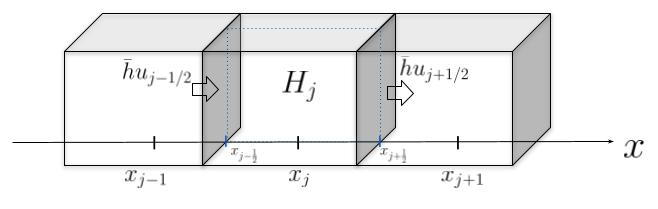

Agora note que vamos precisar do vento $u$ como valor pontual nas interfaces dos volumes de controle. Logo, é natural armazenarmos a velocidade nesses pontos. Pela equação de $u$, usando diferenças finitas centradas, podemos deduzir o seguinte esquema discretizado para as velocidade nas interfaces:



$$
\frac{\partial u_{j+1/2}}{\partial t}  = f \frac{v_{j+1}+v_j}{2}   - g\frac{ (h_{j+1} + \eta^b_{j+1})-(h_{j}+\eta^b_{j})}{\Delta x},
$$
onde passamos o subescrito de $\eta_b$ para um superescrito $\eta^b_{j}$ para facilitar a notação, e vamos armazenar a velocidade $v$  nos centros dos volumes de controle (mais adiante explicaremos os motivos disto). Portanto, a equação para $v$ pode ser discretizada como
$$ \frac{\partial v_{j}}{\partial t} = - f \frac{u_{j+1/2}+u_{j-1/2}}{2},$$


👉 Também há um interpretação integral para o $u$, mas introduziremos esse conceito quando falarmos dos casos 2D.

Para evitar confusão entre a altura $h$ e o passo de tempo, passaremos a chamar o passo de tempo de $\Delta t$.

In [ ]:
#Definição do domínio
#---------------------
erad = 6371220 #Raio da Terra

 # As unidade vão estar associadas às dimensões da Terra
class Dominio:
  def __init__(self, t0=0.0, T=3600.0, a=0.0, b=2*np.pi*erad, dt=100.0, dx=100.0, n=None, m=None):

    self.t0 = t0   #Tempo inicial (segundos)
    self.T = T     #Tempo final (segundos)
    self.a = a     #Extremo esquerdo no espaço (metros)
    self.b = b     #Extremo direito no espaço (metros)

    #Discretização no tempo
    if n==None:
      n = (T-t0)/dt
      if not n.is_integer():
        print("Cuidado! Com esse dt o número de passos de tempo não é inteiro!! Ajustei para ser inteiro.")
        print(" dt original", dt, " dt usado:", (T-t0)/(int((T-t0)/dt)))
    else:
      dt = (T-t0)/n
      print("Calculando dt baseado no n dado. dt = ", dt)

    self.n = int((T-t0)/dt)                #Número de passos no tempo
    self.t = np.linspace(t0, T, self.n+1)  #Tempos discretos

    #Discretização no espaço
    if m==None:
      m = (b-a)/dx
      if not m.is_integer():
        print("Cuidado! Com esse dx o número de pontos no espaço não é inteiro!! Ajustei para ser inteiro.")
        print("  dx original: ", dx, "   dx usado:", (b-a)/(int((b-a)/dx)))
    else:
      dx = (b-a)/m
      print("Calculando dx baseado no m dado. dx = ", dx)

    self.m = int((b-a)/dx)                #Número de pontos no espaço
    self.x = np.linspace(a, b-dx, self.m)  #Pontos no espaço inteiros
    self.x_meio = np.linspace(a+dx/2.0, b-dx/2.0, self.m)  #Pontos no espaço nas interfaces

    self.dt = (T-t0)/n   #Passo de tempo (segundos)
    self.dx = (b-a)/m   #Intervalo espacial (metros)


In [ ]:
#Definição do problema
#---------------------

class SWE_1D:
  def __init__(self, hbar = 10000.0, f = 7.292e-05, g = 9.8, ini = 1, dom = Dominio()):
    self.hbar = hbar #Altura média do fluido - constante em metros
    self.f = f       #Constante da frequência de Coriolis
    self.g = g       # Acel. gravidade

    self.dom = dom
    self.ini = ini    # Condição Inicial
                      #        0 - balanço geostrófico
                      #        1 - pulsos
                      #        2 - jato

    self.eta_b = self.topo(dom.x) #Topografia pre-calculada

  def u0(self, x):  #Condição inicial em u
    if self.ini == 0:
      #Balanço geostrófico
      return np.zeros_like(x)

    elif self.ini == 1:
      #Repouso
      return np.zeros_like(x)

    elif self.ini == 2:
      #jatos
      u0 = 50.0
      return u0*np.power(np.sin(2*np.pi*x/(self.dom.b-self.dom.a)), 81)

    else:
      #repouso
      return np.zeros_like(x)

  def v0(self, x):  #Condição inicial em v

    if self.ini == 0:
      #Balanço geostrófico
      return (self.g/self.f)*np.cos(2*np.pi*x/(dom.b-dom.a))*2*np.pi/(dom.b-dom.a)

    elif self.ini == 1:
      #Repouso
      return np.zeros_like(x)

    elif self.ini == 2:
      #Repouso
      return np.zeros_like(x)

    else:
      #repouso
      return np.zeros_like(x)

  def h0(self, x):  #Condição inicial na altura

    if self.ini == 0:
      #Balanço geostrófico
      return np.sin(2*np.pi*x/(dom.b-dom.a)) + self.hbar*np.ones_like(x)

    elif self.ini == 1:
      #Pulso
      h0 = 100.0
      return h0*np.power(np.sin(2*np.pi*x/(self.dom.b-self.dom.a)), 80) + self.hbar*np.ones_like(x)

    elif self.ini == 2:
      #Constante
      return self.hbar*np.ones_like(x)

    else:
      # constante
      return self.hbar*np.ones_like(x)

  def topo(self, x): #topografia
    if self.ini == 0 :
      return np.zeros_like(x)

    elif self.ini == 1:
      return np.zeros_like(x)

    elif self.ini == 2:
      # balanço
      #return np.sin(2*np.pi*x/(dom.b-dom.a)) + self.hbar*np.ones_like(x)
      return np.zeros_like(x)

    else:
      return np.zeros_like(x)





Cuidado! Com esse dx o número de pontos no espaço não é inteiro!! Ajustei para ser inteiro.
   dx usado: 100.00013962206943


In [ ]:
#Agora vamos criar um domínio específico e problema
dom = Dominio(t0=0.0, T=3600.0, a=0.0, b=2*np.pi*erad, dt=120, dx=2*np.pi*erad/1000)
prob = SWE_1D(hbar = 10000.0, f = 7.292e-05, g = 9.8, ini = 1, dom = dom)

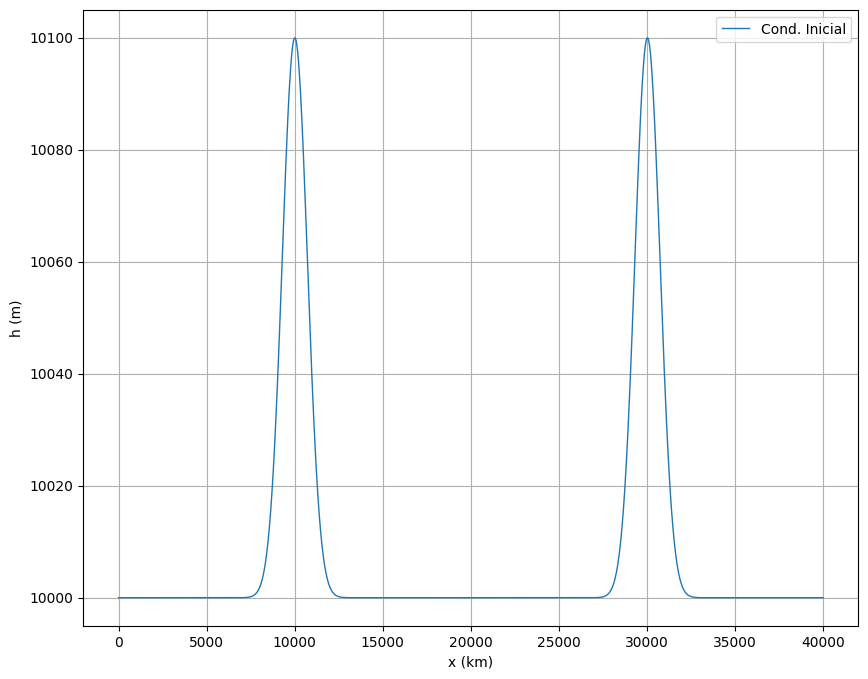

In [ ]:
# Gráficos da condição inicial de pulsos
figure, axs = plt.subplots(figsize=(10,8))
plt.plot(dom.x/1000.0, prob.h0(dom.x), '-', label="Cond. Inicial", linewidth=1)
plt.xlabel("x (km)")
plt.ylabel("h (m)")
plt.grid()
plt.legend()
plt.show()

Para facilitar, vamos introduzir uma notação de diferenças finitas bem conveniente para deduzir os métodos:

* $$ (\delta_x u)_j = \frac{u_{j+1/2}-u_{j-1/2}}{\Delta x} $$

* $$ (\delta_x h)_{j+ 1/2} = \frac{h_{j+ 1}-h_{j}}{\Delta x} $$

* $$ (\overline u^x)_j = \frac{u_{j+1/2}+u_{j-1/2}}{2} $$

* $$ (\overline   h^x)_{j+ 1/2} = \frac{h_{j+ 1}+h_{j}}{2} $$

e vamos guardar as variáveis de forma *deslocada*, com $h$ e $v$ nos índices inteiros e $u$ nas interfaces.



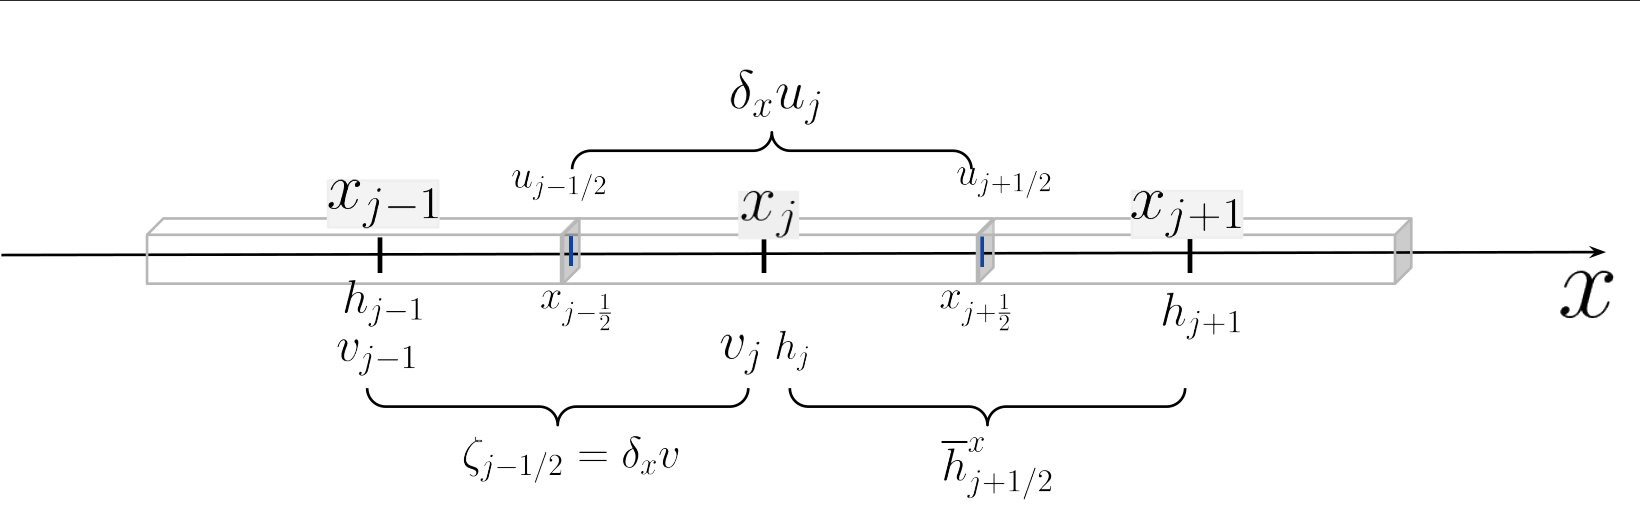

In [ ]:
#Operadores

#  Nossa disposição numérica das variáveis (note a periodicidade)
#
#    v0              v1               v2               v3     v(m-1)                v(m-1)                vm=v0
#    h0              h1               h2               h3     h(m-1)                h(m-1)                hm=h0
#    |------u0--------|------u1--------|------u2--------|- ... -|------u(m-2)---------|------u(m-1)--------|---------u(m)=u(0)
#    x0     x1/2     x1     x3/2      x2     x5/2      x3  ... x(m-2)  x(m-3/2)      x(m-1)  x(m-1/2)      xm=x0
#
#  Lembrado que x0=xm, pelas condições periódicas de fronteira!!!! Logo h0=hm.


# Aplica diferenças assumindo periodicidade

def del_x(a, orig="h"):
  #Orig = origem dos pontos
  #     = u -> vai levar a informação de pontos intermediários para inteiros
  #     = h -> vai levar a informação de pontos inteiros para intermediários

  m = len(a)

  if orig=="h" or orig=="v":
    b = np.append(a, a[0]) #adiciona periodicidade no final (dim m+1)

  elif orig=="u" :
    b = np.append(a[-1], a) #adiciona periodicidade no início (dim m+1)

  else:
    print("Erro: não sei fazer essa conta")
    return a

  return b[1:m+1]-b[0:m]

# Aplica média assumindo periodicidade
def bar_x(a, orig="h"):
  #Orig = origem dos pontos
  #     = u -> vai levar a informação de pontos intermediários para inteiros
  #     = h -> vai levar a informação de pontos inteiros para intermediários

  m = len(a)

  if orig=="h" or orig=="v":
    b = np.append(a, a[0]) #adiciona periodicidade no final (dim m+1)

  elif orig=="u":
    b = np.append(a[-1], a) #adiciona periodicidade no início (dim m+1)

  else:
    print("Erro: não sei fazer essa conta")
    return a

  return (0.5)*(b[1:m+1]+b[0:m])


Assim, para as equações,

$$
\frac{\partial h }{\partial t} = - \frac{\partial (\bar{h} u) }{\partial x} ,
$$


$$ \frac{\partial u}{\partial t}  - f v  = - \frac{ \partial (g (h +\eta_b))}{\partial x} ,$$
$$ \frac{\partial v}{\partial t} + f u  = 0 .$$


podemos deduzir o seguinte método:
>$$ \frac{\partial h }{\partial t} = - \delta_x  ( \overline h u) $$
$$ \frac{\partial u}{\partial t}   =  f\overline{v}^x  - \delta_xH,$$
$$ \frac{\partial v}{\partial t} = - f \overline{u}^x .$$

onde

$$ H = g(h+\eta^b) $$



In [ ]:
def tend_lin(u, v, h, dom, prob): # Lado direito da equação - método numérico!


  #Tendencia em h
  # -- igual ao nosso método de Advecção mas agora com notação compacta!
  #--------------------
  F = prob.hbar*u
  htend = - del_x(F, "u")/dom.dx

  #Tendencia em u
  #--------------------
  H = prob.g*(h + prob.eta_b)
  utend = prob.f * bar_x(v, "v") - del_x(H, "h")/ dom.dx

  #Tendencia em v
  #--------------------
  vtend = - prob.f * bar_x(u, "u")

  return utend, vtend, htend

Para a integração temporal, usamos o método RK estudado anteriormente. Porém, agora ele resolve um sistema de equações diferenciais ordinárias!!!

In [ ]:

def rk33mpas(dom, prob, tend):
  #Recebe um domínio discreto e um problema para resolver
  #Devolve a solução numérica ao longo do tempo

  # u mora nas interfaces
  u = np.zeros((dom.m, dom.n+1))  #(j-espaço, k-tempo)
  u[:,0] = prob.u0(dom.x_meio)

  # v mora nos pontos inteiros
  v = np.zeros((dom.m, dom.n+1))  #(j-espaço, k-tempo)
  v[:,0] = prob.v0(dom.x)

  # h mora nos pontos inteiros
  h = np.zeros((dom.m, dom.n+1))  #(j-espaço, k-tempo)
  h[:,0] = prob.h0(dom.x)

  #loop no tempo
  for k in range(dom.n):
    #Atualização com RK33
    u[:,k+1], v[:,k+1], h[:,k+1] = rk33mpas_1step(u[:,k], v[:,k], h[:,k], tend, dom, prob)

  return u, v, h

## O método de Runge-Kutta 3 3 do MPAS
## Realiza 1 passo no tempo de tamanho dt
## partindo da condição u0
def rk33mpas_1step(u0, v0, h0, tend, dom, prob):
  u = np.copy(u0)
  v = np.copy(v0)
  h = np.copy(h0)
  dt = dom.dt
  dt_step = [dt/3.0, dt/2.0, dt]
  for s in range(3): #loop dos estágios RK
    utend, vtend, htend = tend(u, v, h, dom, prob)
    u = u0+dt_step[s] * utend
    v = v0+dt_step[s] * vtend
    h = h0+dt_step[s] * htend
  # Note que não precisamos salvar os estágios, mas precisamos salvar o ponto de partida
  return u, v, h

In [ ]:
#Agora vamos criar um domínio específico e problema
# Vamos rodar por 1 dia a simulação, com passo de tempo de 100 segundos e dx ~ 200 km
dom = Dominio(t0=0.0, T=60*60*24, a=0.0, b=2*np.pi*erad, dt=100, dx=2*np.pi*erad/200)
prob = SWE_1D(hbar = 10000.0, f = 7.292e-05, g = 9.8, ini=1, dom = dom)

#Rodar o modelo!
u, v, h = rk33mpas(dom, prob, tend_lin)


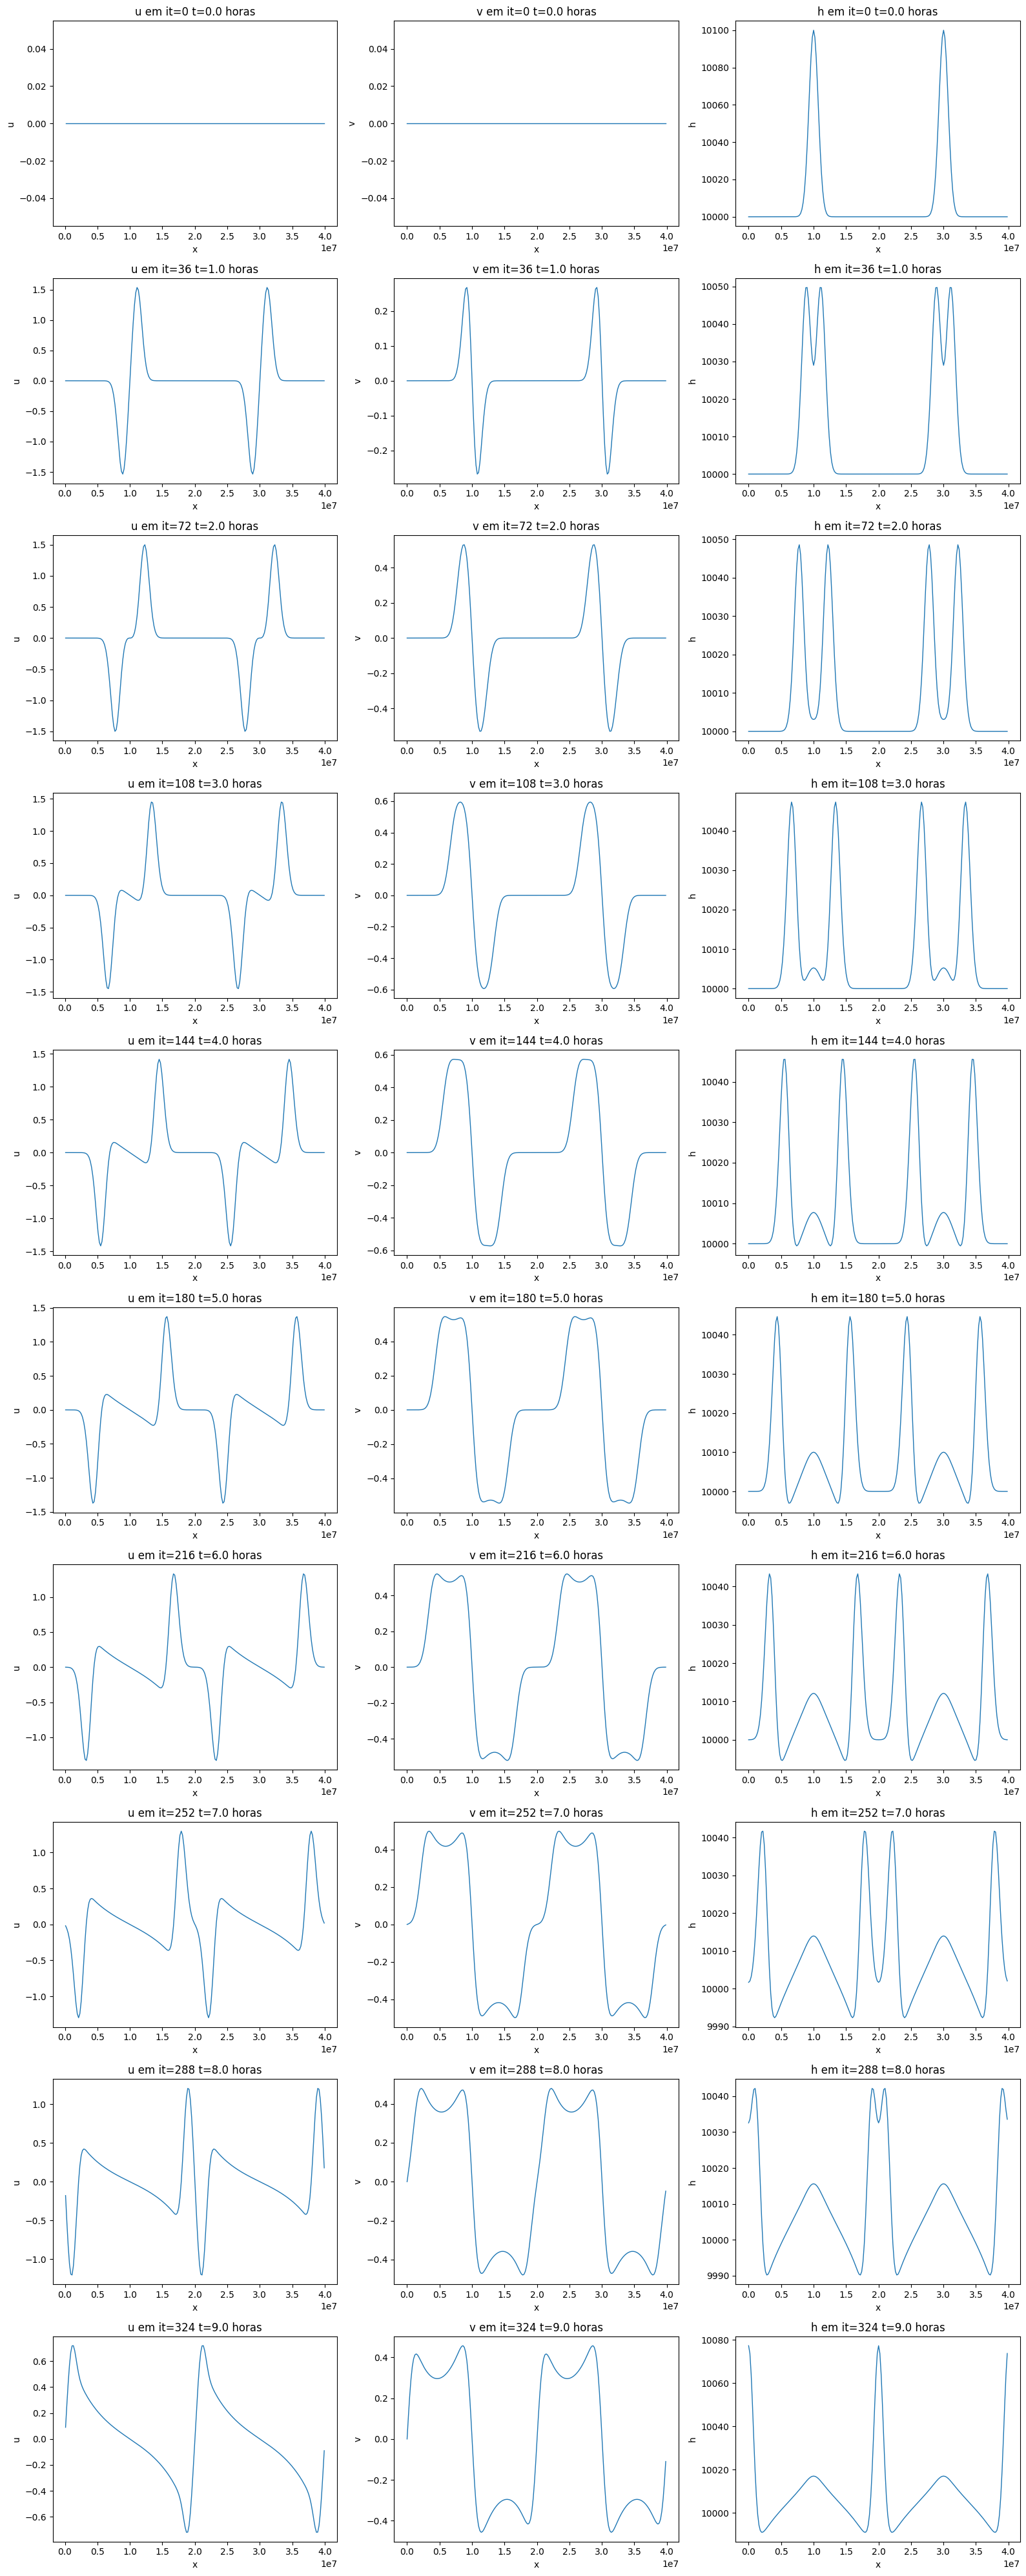

In [ ]:
# Gráficos

#tdia = 60*60*24
thora = 60*60
#ndias = 10
nhoras = 10
tempo = np.array([i*thora for i in range(nhoras)]) #int(dom.n/2)
#tempo = np.array([0.0, dom.dt, dom.dt*2, dom.dt*3])
it = tempo*(dom.n)/dom.T
it = it.astype(int)
fig, axs = plt.subplots(nhoras, 3, figsize=(16,4*nhoras))

for i in range(nhoras):
  axs[i, 0].set_title("u em it="+str(it[i])+" t="+str(tempo[i]/thora)+" horas")
  #axs[i, 0].plot(dom.x_meio, u[:,it[i]]-u[:,0], label="u", linewidth=1)
  axs[i, 0].plot(dom.x_meio, u[:,it[i]], label="u", linewidth=1)
  axs[i, 0].set_xlabel("x")
  axs[i, 0].set_ylabel("u")

  axs[i, 1].set_title("v em it="+str(it[i])+" t="+str(tempo[i]/thora)+" horas")
  #axs[i, 1].plot(dom.x, v[:,it[i]]-v[:,0], label="v", linewidth=1)
  axs[i, 1].plot(dom.x, v[:,it[i]], label="v", linewidth=1)
  axs[i, 1].set_xlabel("x")
  axs[i, 1].set_ylabel("v")

  axs[i, 2].set_title("h em it="+str(it[i])+" t="+str(tempo[i]/thora)+" horas")
  #axs[i, 2].plot(dom.x, h[:,it[i]]-h[:,0], label="h", linewidth=1)
  axs[i, 2].plot(dom.x, h[:,it[i]], label="h", linewidth=1)
  axs[i, 2].set_xlabel("x")
  axs[i, 2].set_ylabel("h")

fig.tight_layout()
plt.show()



---



### Validação do código

Caso de balanço geostrófico (estacionário):

$$
\frac{\partial h }{\partial t} = 0,
$$


$$ \frac{\partial u}{\partial t} = 0,$$
$$ \frac{\partial v}{\partial t} = 0 .$$

Logo
$$
- \frac{\partial (\bar{h} u) }{\partial x} = 0 ,
$$
portando $u$ deve ser constante!

$$ - f v  = - \frac{ \partial (g (h +\eta_b))}{\partial x} ,$$
exprime a noção de balanço entre o vento $v$ e a altura.

$$ f u  = 0 ,$$
indica que que $u=0$.

Vamos assumir que
$$
h(t,x) = \sin(2\pi x / L),
$$
$$
\eta_b(x) = 0,
$$
onde $L$ é o tamanho do domínio. Assim, temos que
$$
v(t,x) = \frac{g}{f}\frac{2\pi}{L}\sin(2\pi x / L),
$$
e
$$
u(t,x) = 0
$$
definem um problem em balanço geostrófico!

Vamos testar o problema agora variando o $\Delta x $ e $\Delta t$.

👉 Cuidado com a estabilidade!!! CFL está lavendo aqui!

👉 Qual a velocidade de onda neste caso? As ondas mais rápidas são as de gravidade, que tem velocidade de $\sqrt{g\bar{h}}$.



In [ ]:
#Convergência no espaço
g = 9.8
hbar = 10000.0
f = 7.292e-05
wave_speed = np.sqrt(g*hbar)

dx_list = [2*np.pi*erad/50, 2*np.pi*erad/100, 2*np.pi*erad/200, 2*np.pi*erad/400, 2*np.pi*erad/800]
tab = PrettyTable(["Dx (km)", "Dt (min)", "Courant", "Erro u", "Erro v", "Erro h"])
for dx in dx_list:
  #Agora vamos criar um domínio específico e problema
  dt = 120 #segundos
  c = wave_speed*dt/dx
  dom = Dominio(t0=0.0, T=60*60*24, a=0.0, b=2*np.pi*erad, dt=dt, dx=dx)
  prob = SWE_1D(hbar = hbar, f = f, g = g, ini =0, dom = dom)
  u, v, h = rk33mpas(dom, prob, tend_lin)
  # Como a solução não pode variar, deve ficar estacionária,
  #podemos calcular o erro comparando com a condição inicial
  er_u = np.max(np.abs(u[:,-1]-u[:,0]))
  er_v = np.max(np.abs(v[:,-1]-v[:,0]))
  er_h = np.max(np.abs(h[:,-1]-h[:,0]))
  tab.add_row([dx/1000, dt/60, c, er_u, er_v, er_h ])

print(tab)

+--------------------+----------+---------------------+------------------------+------------------------+------------------------+
|      Dx (km)       | Dt (min) |       Courant       |         Erro u         |         Erro v         |         Erro h         |
+--------------------+----------+---------------------+------------------------+------------------------+------------------------+
| 800.6311178561743  |   2.0    | 0.04692041214009474 | 2.2175872950769007e-05 | 1.403209857559623e-05  | 0.0003018335992237553  |
| 400.31555892808717 |   2.0    | 0.09384082428018949 |  5.56070296028547e-06  | 3.5470470133823484e-06 |  7.63731495680986e-05  |
| 200.15777946404359 |   2.0    | 0.18768164856037897 | 1.3912050359688762e-06 | 8.892037756322302e-07  | 1.9141141820000485e-05 |
| 100.07888973202179 |   2.0    | 0.37536329712075794 | 3.4786553901738463e-07 | 2.2245365376497017e-07 | 4.788267688127235e-06  |
| 50.039444866010896 |   2.0    |  0.7507265942415159 | 8.697064226604139e-08  | 5.

Qual a ordem de convergência no espaço?

In [ ]:
#Convergência no tempo
g = 9.8
hbar = 10000.0
f = 7.292e-05
wave_speed = np.sqrt(g*hbar)

dt_list = [640, 320, 160, 80, 40, 20, 10]
tab = PrettyTable(["Dx (km)", "Dt (min)", "Courant", "Erro u", "Erro v", "Erro h"])
for dt in dt_list:
  #Agora vamos criar um domínio específico e problema
  dx = 2*np.pi*erad/200
  c = wave_speed*dt/dx
  dom = Dominio(t0=0.0, T=60*60*24, a=0.0, b=2*np.pi*erad, dt=dt, dx=dx)
  prob = SWE_1D(hbar = hbar, f = f, g = g, ini =0, dom = dom)
  u, v, h = rk33mpas(dom, prob, tend_lin)
  # Como a solução não pode variar, deve ficar estacionária,
  #podemos calcular o erro comparando com a condição inicial
  er_u = np.max(np.abs(u[:,-1]-u[:,0]))
  er_v = np.max(np.abs(v[:,-1]-v[:,0]))
  er_h = np.max(np.abs(h[:,-1]-h[:,0]))
  tab.add_row([dx/1000, dt/60, c, er_u, er_v, er_h ])

print(tab)

+--------------------+---------------------+---------------------+------------------------+-----------------------+------------------------+
|      Dx (km)       |       Dt (min)      |       Courant       |         Erro u         |         Erro v        |         Erro h         |
+--------------------+---------------------+---------------------+------------------------+-----------------------+------------------------+
| 200.15777946404359 |  10.666666666666666 |  1.0009687923220212 |  0.001670295029791277  | 2.610128740112433e-06 |  0.049281704508757684  |
| 200.15777946404359 |  5.333333333333333  |  0.5004843961610106 | 1.391196210206354e-06  | 8.892058981080364e-07 | 1.914118547574617e-05  |
| 200.15777946404359 |  2.6666666666666665 |  0.2502421980805053 | 1.3912044472702374e-06 | 8.892039009590624e-07 |  1.91411490959581e-05  |
| 200.15777946404359 |  1.3333333333333333 | 0.12512109904025265 | 1.3912055306960704e-06 | 8.892036745082599e-07 | 1.914116546686273e-05  |
| 200.1577794

Ué? Não há convergência no tempo?!?!?!?!

O erro espacial domina!!!

Analisar a converência em $\Delta t$ começa a ficar mais complicada, pois depende de $\Delta t$ e $\Delta x$. Não podemos deixar $\Delta x$ muito pequeno, se não precisamos de um $\Delta t$ muito pequeno pela estabilidade, e não podemos testar muitos valores de $\Delta t$.

Vamos variar o $\Delta x$ junto com $\Delta t$, mantendo portando um número de Courant constante!

In [ ]:
#Convergência no tempo e espaço
g = 9.8
hbar = 10000.0
f = 7.292e-05
wave_speed = np.sqrt(g*hbar)

dt_list = [1280, 640, 320, 160, 80, 40, 20, 10]
tab = PrettyTable(["Dx (km)", "Dt (min)", "Courant", "Erro u", "Erro v", "Erro h"])
for dt in dt_list:
  dx=(dt/60)*2*np.pi*erad/400
  c = wave_speed*dt/dx
  dom = Dominio(t0=0.0, T=60*60*24, a=0.0, b=2*np.pi*erad, dt=dt, dx=dx)
  prob = SWE_1D(hbar = hbar, f = f, g = g, ini =0, dom = dom)
  u, v, h = rk33mpas(dom, prob, tend_lin)
  # Como a solução não pode variar, deve ficar estacionária,
  #podemos calcular o erro comparando com a condição inicial
  er_u = np.max(np.abs(u[:,-1]-u[:,0]))
  er_v = np.max(np.abs(v[:,-1]-v[:,0]))
  er_h = np.max(np.abs(h[:,-1]-h[:,0]))
  tab.add_row([dx/1000, dt/60, c, er_u, er_v, er_h ])

print(tab)

Cuidado! Com esse dt o número de passos de tempo não é inteiro!! Ajustei para ser inteiro.
 dt original 1280  dt usado: 1289.55223880597
Cuidado! Com esse dx o número de pontos no espaço não é inteiro!! Ajustei para ser inteiro.
  dx original:  2135016.3142831316    dx usado: 2223975.3273782623
Cuidado! Com esse dx o número de pontos no espaço não é inteiro!! Ajustei para ser inteiro.
  dx original:  1067508.1571415658    dx usado: 1081933.9430488844
+--------------------+---------------------+---------------------+------------------------+------------------------+------------------------+
|      Dx (km)       |       Dt (min)      |       Courant       |         Erro u         |         Erro v         |         Erro h         |
+--------------------+---------------------+---------------------+------------------------+------------------------+------------------------+
| 2135.0163142831316 |  21.333333333333332 | 0.18768164856037894 | 0.0008639174726582352  | 0.0005485467178646293  |  0



---



## SWE Não Linear


### Método Numérico

Vamos usar a forma de vetor invariante 1D:

>$$ \frac{\partial h }{\partial t} = - \frac{\partial (h u) }{\partial x}$$
$$ \frac{\partial u}{\partial t}  - q hv  = - \frac{\partial  (g(h +\eta_b) + K)}{\partial x} ,$$
$$ \frac{\partial v}{\partial t} + q h u  = 0 .$$

onde

$$ \zeta = v_x, $$

$$ \omega_a = \zeta + f,$$

$$q=\omega_a/h = \frac{v_x+f}{h},$$




Na notação de antes, e lembrando onde "moram" as variáveis, temos:
>$$ \frac{\partial h }{\partial t} = - \delta_x  ( \overline h^x u) $$
$$ \frac{\partial u}{\partial t}   =  q\overline{hv}^x  - \delta_xH,$$
$$ \frac{\partial v}{\partial t} = - \overline{q \overline{h}^x u}^x .$$

onde

$$ H = g(h+\eta^b) + \frac{\overline{u^2}^x + v^2}{2}  $$


$$ \zeta = \delta_x v, $$

$$ \omega_a = \zeta + f,$$

$$q=\frac{\omega_a}{\overline{h}^x} = \frac{\delta_x v+f}{\overline{h}^x},$$




👉 Estamos indo passo-a-passo, e verão que método usado no MPAS é muito similar a esse em estrutura, apenas com operadores diferentes!

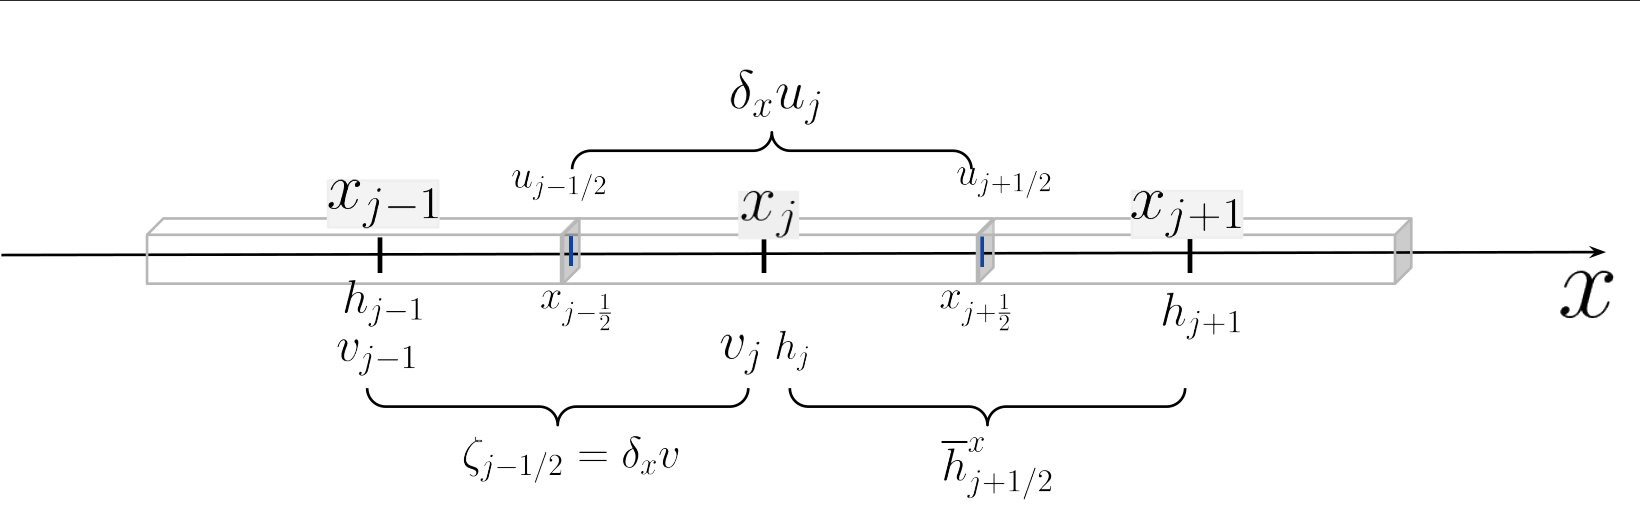

In [ ]:
def tend_nao_lin(u, v, h, dom, prob): # Lado direito da equação - método numérico!


  #Tendencia em h
  # -- igual ao nosso método de Advecção mas agora com notação compacta!
  #--------------------
  F = bar_x(h, "h")*u
  htend = - del_x(F, "u")/dom.dx

  #Tendencia em u
  #--------------------
  K = (bar_x(u*u, "u")+v*v)/2.0
  H = prob.g*(h + prob.eta_b) + K
  q = (del_x(v, "v")/dom.dx + prob.f)/bar_x(h, "h")
  utend = q*bar_x(h*v, "h") - del_x(H, "h")/ dom.dx


  #Tendencia em v
  #--------------------
  vtend = - bar_x(q * bar_x(h, "h") * u, "u")

  return utend, vtend, htend

O método que construímos é um caso particular do método que conserva energia descrito em
- Sadourny, Robert. "The dynamics of finite-difference models of the shallow-water equations." Journal of Atmospheric Sciences 32, no. 4 (1975): 680-689.

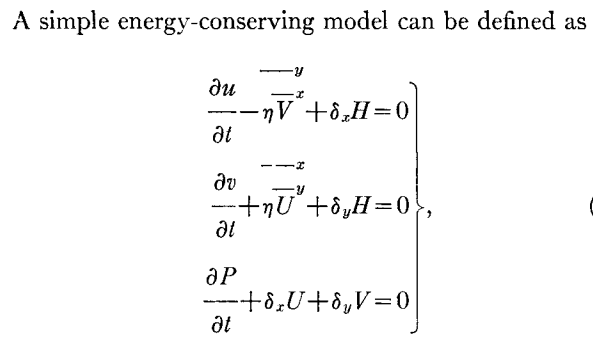

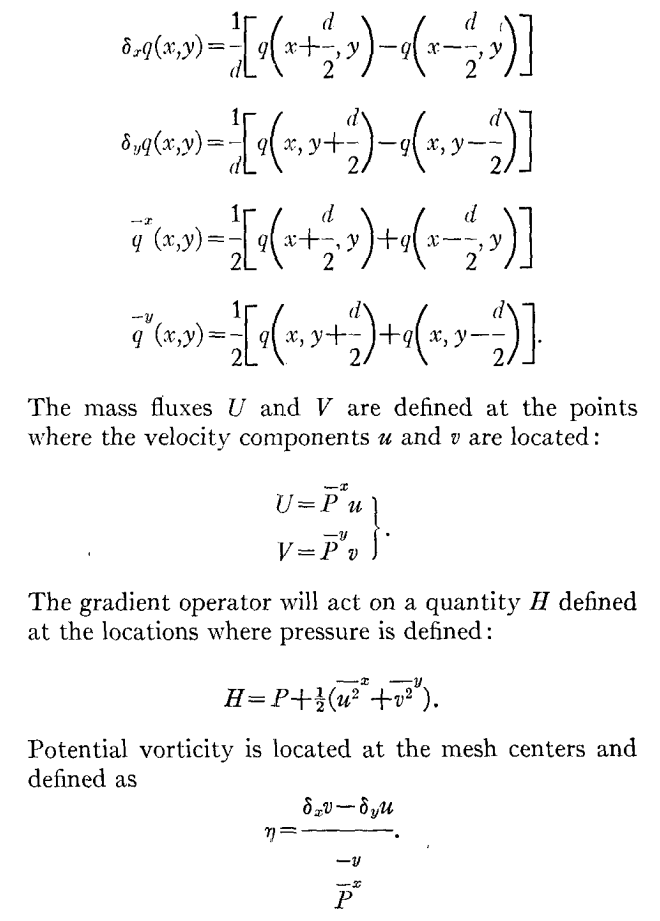



---



### Validação do código

Vamos testar o problema não linear agora!!!

In [ ]:
dom = Dominio(t0=0.0, T=60*60*24, a=0.0, b=2*np.pi*erad, dt=100, dx=2*np.pi*erad/200)
prob = SWE_1D(hbar = 10000.0, f = 7.292e-05, g = 9.8, ini=0, dom = dom)
u, v, h = rk33mpas(dom, prob, tend_nao_lin)

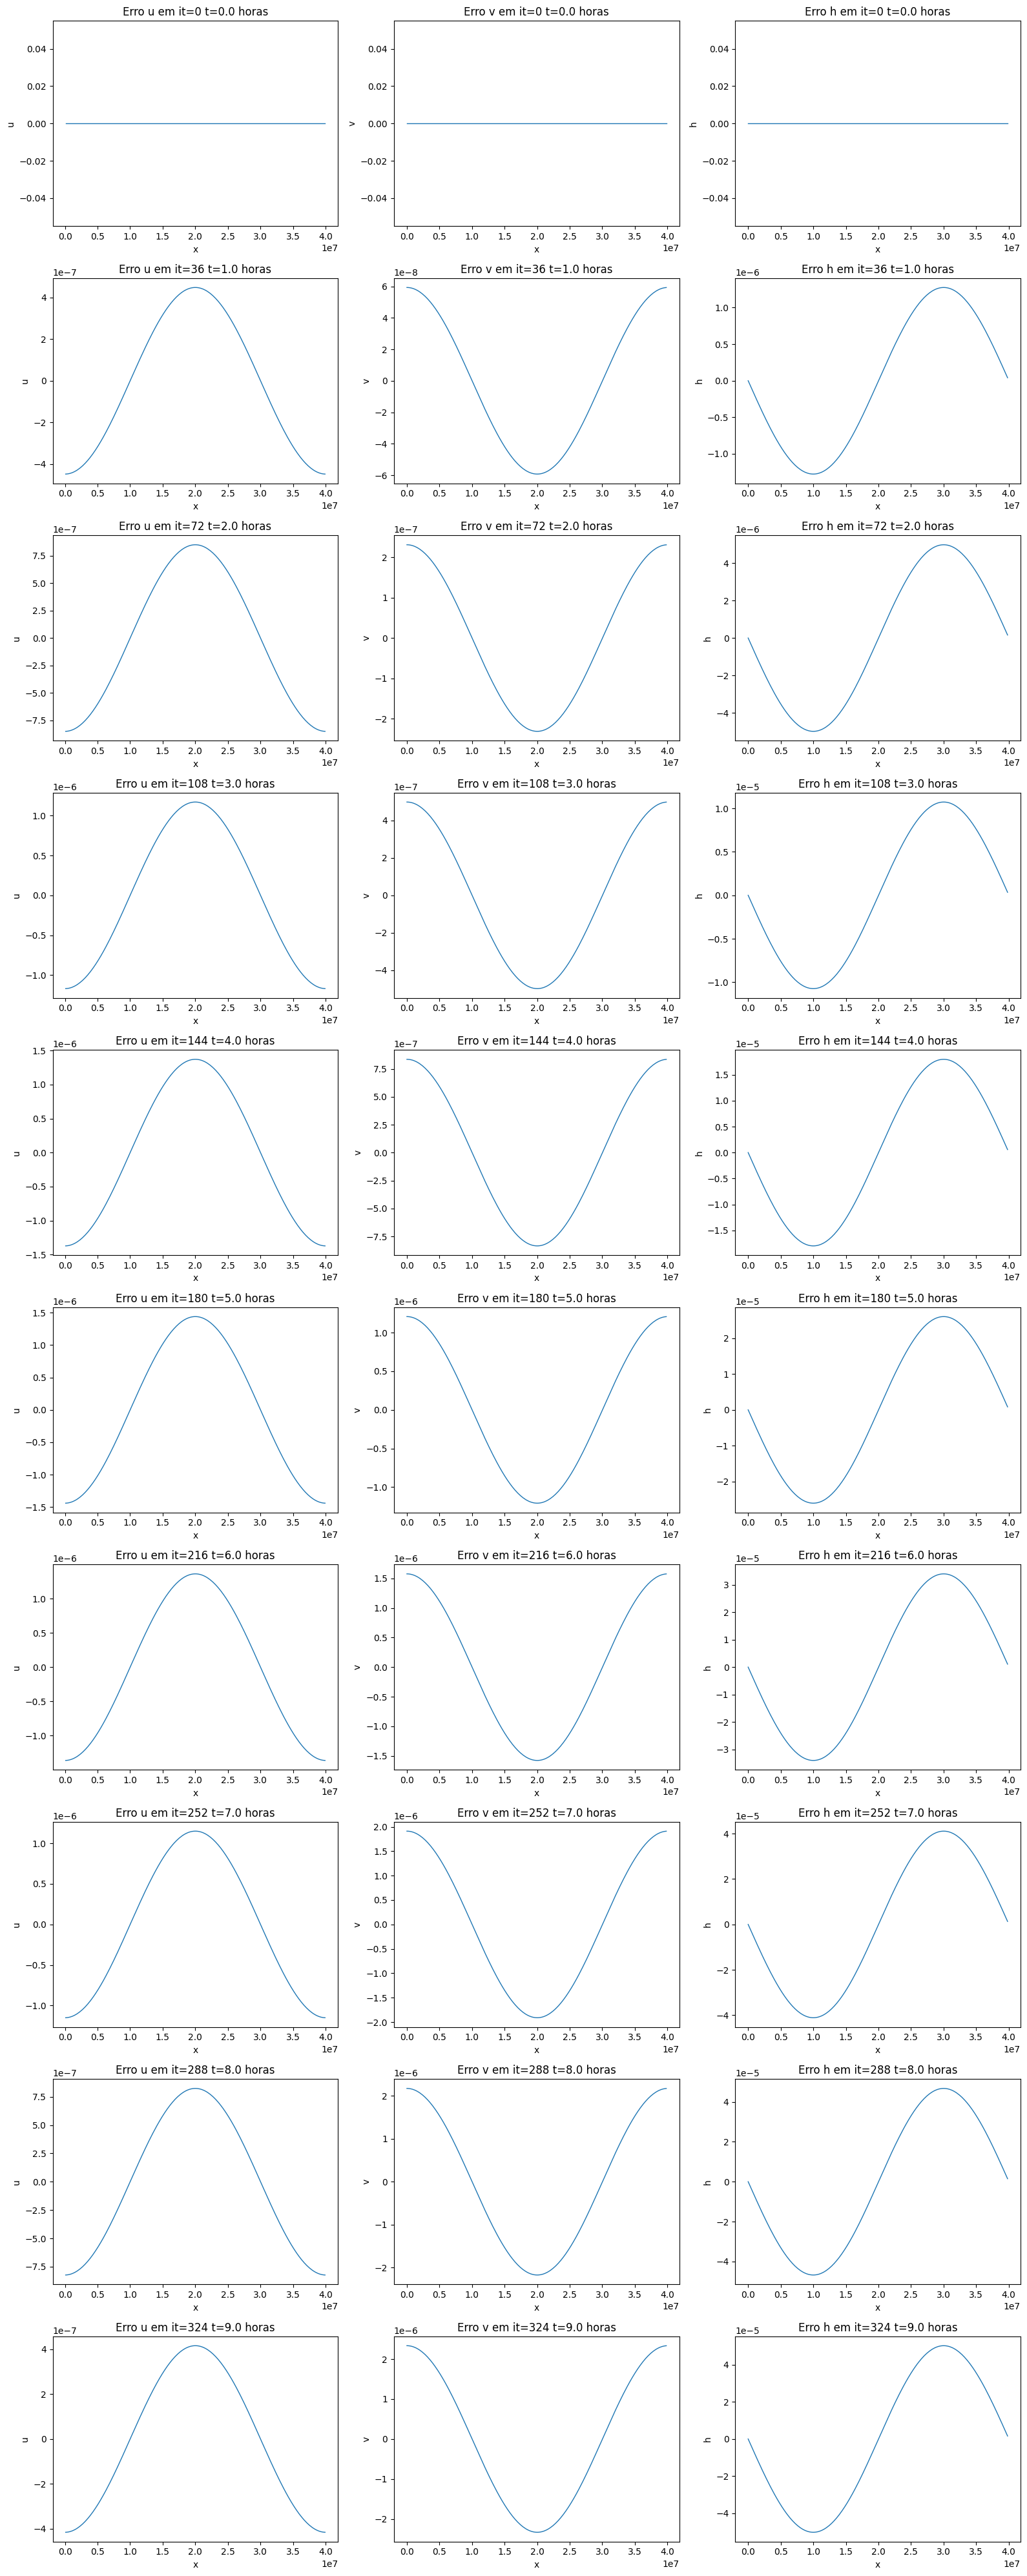

In [ ]:
# Gráficos

thora = 60*60
nhora = 10
tempo = np.array([i*thora for i in range(nhora)]) #int(dom.n/2)
#tempo = np.array([0.0, dom.dt, dom.dt*2, dom.dt*3])
it = tempo*(dom.n)/dom.T
it = it.astype(int)
fig, axs = plt.subplots(nhora, 3, figsize=(16,4*nhora))

for i in range(nhora):

  axs[i, 0].plot(dom.x_meio, u[:,it[i]]-u[:,0], label="u", linewidth=1)
  axs[i, 0].set_title("Erro u em it="+str(it[i])+" t="+str(tempo[i]/thora)+" horas")
  #axs[i, 0].set_title("u em it="+str(it[i])+" t="+str(tempo[i]/tdia)+" dias")
  #axs[i, 0].plot(dom.x_meio, u[:,it[i]], label="u", linewidth=1)
  axs[i, 0].set_xlabel("x")
  axs[i, 0].set_ylabel("u")

  axs[i, 1].set_title("Erro v em it="+str(it[i])+" t="+str(tempo[i]/thora)+" horas")
  axs[i, 1].plot(dom.x, v[:,it[i]]-v[:,0], label="v", linewidth=1)
  #axs[i, 1].set_title("v em it="+str(it[i])+" t="+str(tempo[i]/tdia)+" dias")
  #axs[i, 1].plot(dom.x, v[:,it[i]], label="v", linewidth=1)
  axs[i, 1].set_xlabel("x")
  axs[i, 1].set_ylabel("v")

  axs[i, 2].set_title("Erro h em it="+str(it[i])+" t="+str(tempo[i]/thora)+" horas")
  axs[i, 2].plot(dom.x, h[:,it[i]]-h[:,0], label="h", linewidth=1)
  #axs[i, 2].set_title("h em it="+str(it[i])+" t="+str(tempo[i]/tdia)+" dias")
  #axs[i, 2].plot(dom.x, h[:,it[i]], label="h", linewidth=1)
  axs[i, 2].set_xlabel("x")
  axs[i, 2].set_ylabel("h")

fig.tight_layout()
plt.show()

In [ ]:
#Convergência no tempo e espaço
g = 9.8
hbar = 10000.0
f = 7.292e-05
wave_speed = np.sqrt(g*hbar)

dt_list = [1280, 640, 320, 160, 80, 40, 20, 10]
tab = PrettyTable(["Dx (km)", "Dt (min)", "Courant", "Erro u", "Erro v", "Erro h"])
for dt in dt_list:
  dx=(dt/60)*2*np.pi*erad/400
  c = wave_speed*dt/dx
  dom = Dominio(t0=0.0, T=60*60*24, a=0.0, b=2*np.pi*erad, dt=dt, dx=dx)

  prob = SWE_1D(hbar = hbar, f = f, g = g, ini =0, dom = dom)
  u, v, h = rk33mpas(dom, prob, tend_nao_lin)
  # Como a solução não pode variar, deve ficar estacionária,
  #podemos calcular o erro comparando com a condição inicial
  er_u = np.max(np.abs(u[:,-1]-u[:,0]))
  er_v = np.max(np.abs(v[:,-1]-v[:,0]))
  er_h = np.max(np.abs(h[:,-1]-h[:,0]))
  tab.add_row([dx/1000, dt/60, c, er_u, er_v, er_h ])

print(tab)

Cuidado! Com esse dt o número de passos de tempo não é inteiro!! Ajustei para ser inteiro.
 dt original 1280  dt usado: 1289.55223880597
Cuidado! Com esse dx o número de pontos no espaço não é inteiro!! Ajustei para ser inteiro.
  dx original:  2135016.3142831316    dx usado: 2223975.3273782623
Cuidado! Com esse dx o número de pontos no espaço não é inteiro!! Ajustei para ser inteiro.
  dx original:  1067508.1571415658    dx usado: 1081933.9430488844
+--------------------+---------------------+---------------------+------------------------+------------------------+------------------------+
|      Dx (km)       |       Dt (min)      |       Courant       |         Erro u         |         Erro v         |         Erro h         |
+--------------------+---------------------+---------------------+------------------------+------------------------+------------------------+
| 2135.0163142831316 |  21.333333333333332 | 0.18768164856037894 | 0.0008639522174593028  | 0.0005485556343429697  |  0

### Exemplo Não Linear

In [ ]:
dom = Dominio(t0=0.0, T=60*60*24, a=0.0, b=2*np.pi*erad, dt=100, dx=2*np.pi*erad/400)
prob = SWE_1D(hbar = 10000.0, f = 7.292e-05, g = 9.8, ini=2, dom = dom)
ulin, vlin, hlin = rk33mpas(dom, prob, tend_lin)
u, v, h = rk33mpas(dom, prob, tend_nao_lin)

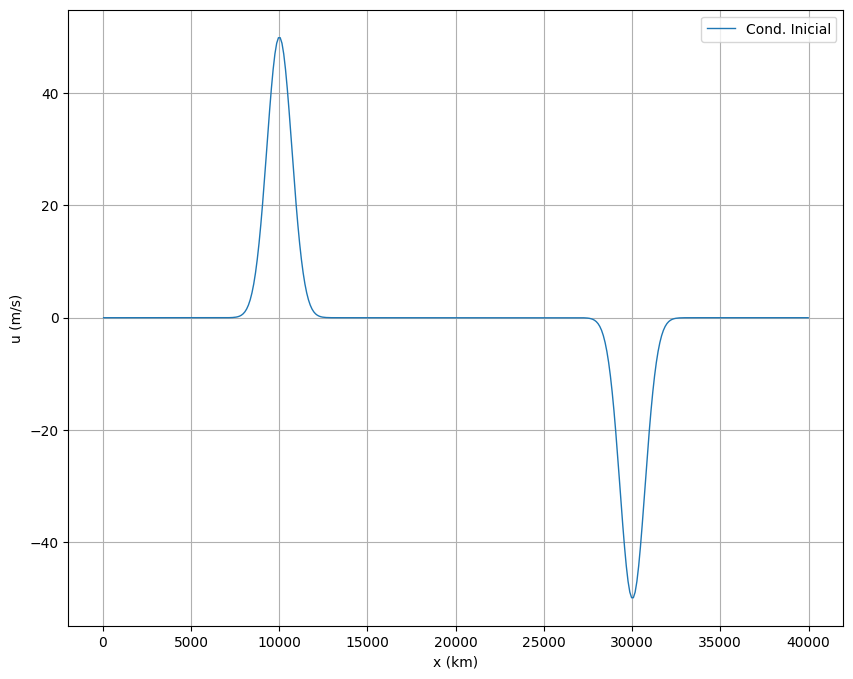

In [ ]:
# Gráficos da condição inicial de jatos zonais
figure, axs = plt.subplots(figsize=(10,8))
#plt.plot(dom.x_meio/1000.0, prob.u0(dom.x), '-', label="Cond. Inicial", linewidth=1)
plt.plot(dom.x_meio/1000.0, u[:,0], '-', label="Cond. Inicial", linewidth=1)
plt.xlabel("x (km)")
plt.ylabel("u (m/s)")
plt.grid()
plt.legend()
plt.show()

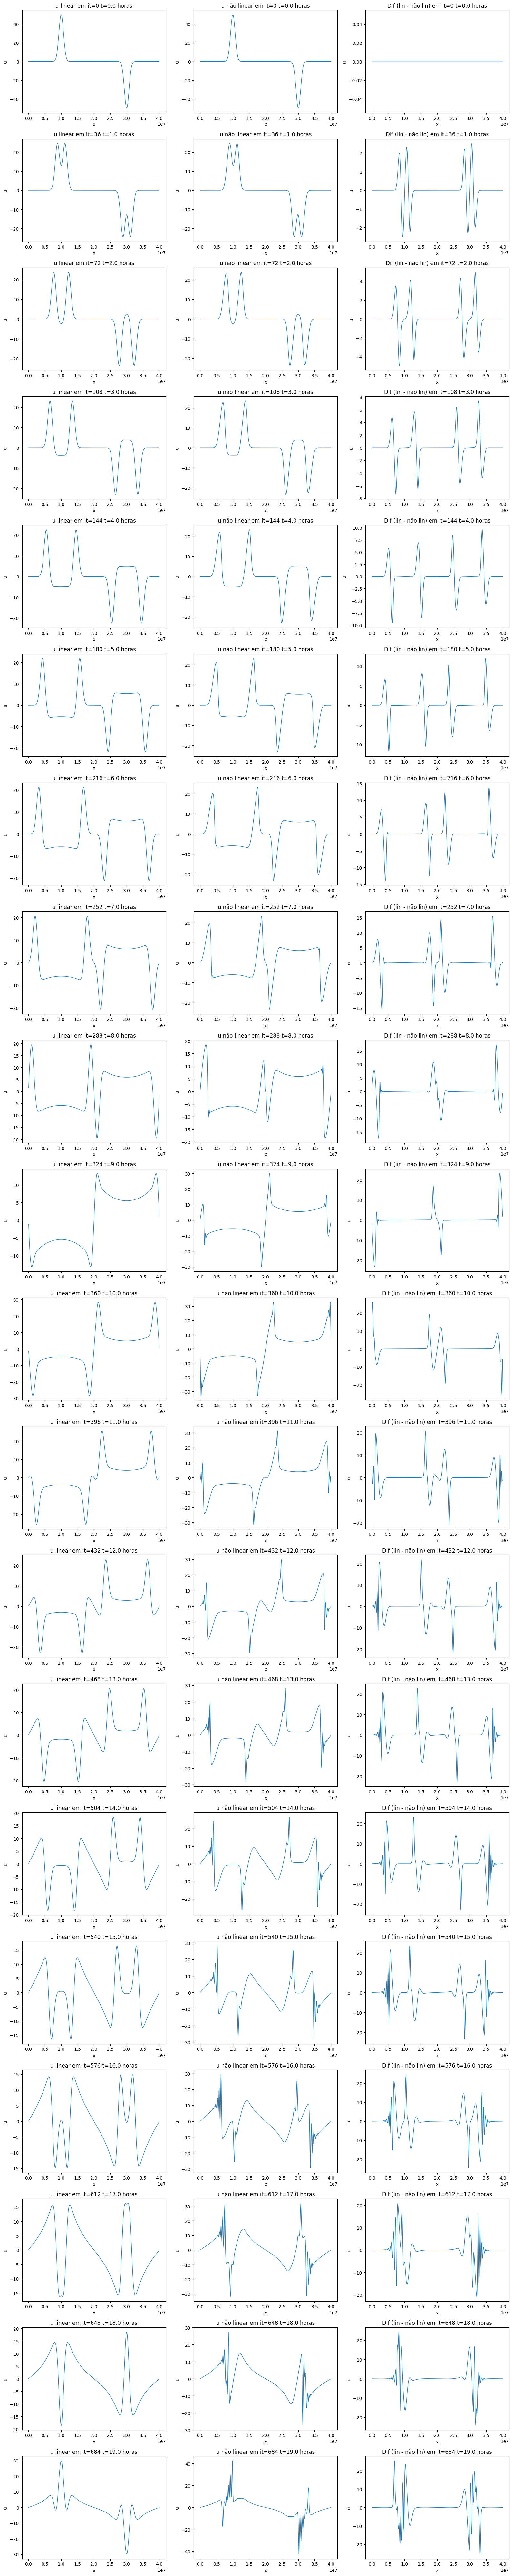

In [ ]:
# Gráficos

thora = 60*60
nhora = 20
tempo = np.array([i*thora for i in range(nhora)]) #int(dom.n/2)
#tempo = np.array([0.0, dom.dt, dom.dt*2, dom.dt*3])
it = tempo*(dom.n)/dom.T
it = it.astype(int)
fig, axs = plt.subplots(nhora, 3, figsize=(16,4*nhora))

#Plot h
# for i in range(nhora):
#   axs[i, 0].set_title("h linear em it="+str(it[i])+" t="+str(tempo[i]/thora)+" horas")
#   axs[i, 0].plot(dom.x, hlin[:,it[i]], label="hlin", linewidth=1)
#   axs[i, 0].set_xlabel("x")
#   axs[i, 0].set_ylabel("h")

#   axs[i, 1].set_title("h não linear em it="+str(it[i])+" t="+str(tempo[i]/thora)+" horas")
#   axs[i, 1].plot(dom.x, h[:,it[i]], label="u", linewidth=1)
#   axs[i, 1].set_xlabel("x")
#   axs[i, 1].set_ylabel("h")

#   axs[i, 2].set_title("Dif (lin - não lin) em it="+str(it[i])+" t="+str(tempo[i]/thora)+" horas")
#   axs[i, 2].plot(dom.x, hlin[:,it[i]]-h[:,it[i]], label="Dif h", linewidth=1)
#   axs[i, 2].set_xlabel("x")
#   axs[i, 2].set_ylabel("Dif h")

#Plot u
for i in range(nhora):
  axs[i, 0].set_title("u linear em it="+str(it[i])+" t="+str(tempo[i]/thora)+" horas")
  axs[i, 0].plot(dom.x_meio, ulin[:,it[i]], label="ulin", linewidth=1)
  axs[i, 0].set_xlabel("x")
  axs[i, 0].set_ylabel("u")

  axs[i, 1].set_title("u não linear em it="+str(it[i])+" t="+str(tempo[i]/thora)+" horas")
  axs[i, 1].plot(dom.x_meio, u[:,it[i]], label="u", linewidth=1)
  axs[i, 1].set_xlabel("x")
  axs[i, 1].set_ylabel("u")

  axs[i, 2].set_title("Dif (lin - não lin) em it="+str(it[i])+" t="+str(tempo[i]/thora)+" horas")
  axs[i, 2].plot(dom.x_meio, ulin[:,it[i]]-u[:,it[i]], label="Dif u", linewidth=1)
  axs[i, 2].set_xlabel("x")
  axs[i, 2].set_ylabel("u")


fig.tight_layout()
plt.show()

### Propriedades conservativas

#### **Massa**

Da equação de conservação de massa (continuidade), temos que

$$
\rho_0\frac{\partial h }{\partial t} = - \rho_0\frac{\partial (h u) }{\partial x} ,
$$
onde estamos multiplicando a equação pela densidade $\rho_0$ para termos unidades de massa. Integrando essa equação no domínio completo, lembrando que temos condições de fronteira periódicas
$$
\frac{\partial M(t) }{\partial t} = - \rho_0\int_{a}^{b}\frac{\partial (h u) }{\partial x}\, dx = - \rho_0(h(t, b) u(t, b)- h(t, a) u(t, a) = 0,
$$
onde a massa é aqui simplificadamente definida como a integral da altura,
$$
M(t)= \rho_0 \int_{a}^{b}h(t,x ) \,dx.
$$

Note que, como a densidade é constante, ela não importa para essa conservação, então a integral da altura $h$ deve ser conservada.

Numericamente, podemos calcular a "massa" (ignorando a densidade, pois é constante) como sendo constante por pedaços
$$
M_j(t)= \Delta x \, h_j(t),
$$

Logo, da definição do método, temos
$$
\frac{\partial M_j(t)}{\partial t} = \Delta x \, \frac{\partial h_j(t)}{\partial t} = - \Delta x \, \delta_x  ( \overline h^x u) = - \left( \frac{h_{j+1}+h_j}{2}u_{j+1/2} - \frac{h_{j}+h_{j-1}}{2}u_{j-1/2}\right) = -(F_{j+1/2} - F_{j-1/2}).
$$

Agora, note que a massa numérica total
$$
\tilde{M}(t) = \sum_{j=0}^{m-1}M_j(t),
$$
é tal que
$$
\frac{\partial \tilde{M}(t)}{\partial t} = \sum_{j=0}^{m-1} \frac{\partial M_j(t)}{\partial t} = -\sum_{j=0}^{m-1}(F_{j+1/2} - F_{j-1/2}) = 0,
$$
pois há um cancelamento por conta dos sinais que aparecem como positivo e negativo dos fluxos em cada volume de controle.

👉 Essa é a essência do método de Volumes Finitos: conservar massa!

Vamos verificar numericamente!

In [ ]:
dom = Dominio(t0=0.0, T=60*60*24, a=0.0, b=2*np.pi*erad, dt=100, dx=2*np.pi*erad/400)
prob = SWE_1D(hbar = 10000.0, f = 7.292e-05, g = 9.8, ini=2, dom = dom)
ulin, vlin, hlin = rk33mpas(dom, prob, tend_lin)
u, v, h = rk33mpas(dom, prob, tend_nao_lin)
M_lin = np.sum(hlin, axis=0)
M_nlin = np.sum(h, axis=0)

print("Erro relativo final de conservação de Massa Linear", (M_lin[-1]-M_lin[0])/M_lin[0])
print("Erro relativo final de conservação de Massa Não Linear", (M_nlin[-1]-M_nlin[0])/M_nlin[0])

Erro relativo final de conservação de Massa Linear 5.820766091346741e-16
Erro relativo final de conservação de Massa Não Linear -5.820766091346741e-16


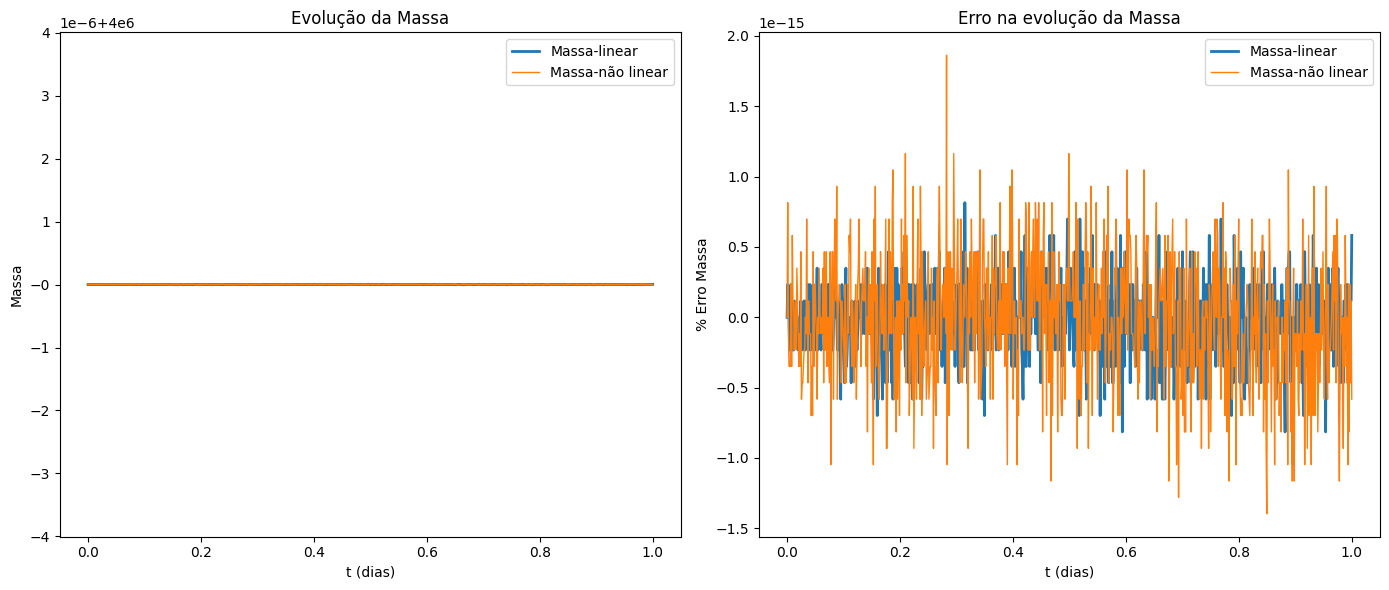

In [ ]:
tdia = 60*60*24

fig, axs = plt.subplots(1, 2, figsize=(14,6))


axs[0].set_title("Evolução da Massa")
axs[0].plot(dom.t/tdia, M_lin, label="Massa-linear", linewidth=2)
axs[0].plot(dom.t/tdia, M_nlin, label="Massa-não linear", linewidth=1)
axs[0].set_xlabel("t (dias)")
axs[0].set_ylabel("Massa")
axs[0].legend()

axs[1].set_title("Erro na evolução da Massa")
axs[1].plot(dom.t/tdia, (M_lin-M_lin[0])/M_lin[0], label="Massa-linear", linewidth=2)
axs[1].plot(dom.t/tdia, (M_nlin-M_nlin[0])/M_nlin[0], label="Massa-não linear", linewidth=1)
axs[1].set_xlabel("t (dias)")
axs[1].set_ylabel("% Erro Massa")
axs[1].legend()

fig.tight_layout()
plt.show()

E a tal conservação? Está dentro da precisão numérica do computador (precisão dupla).

#### **Energia**

Da definição de energia para SWE temos
$$
E=(h\vec{v}\cdot\vec{v}+gh^2)/2.
$$
e sua equação
$$
\frac{\partial E}{\partial t}=-\nabla \cdot \mathbf{F}.
$$
com o fluxo de energia sendo
$$
\mathbf{F}=\vec{v}(h\vec{v}\cdot\vec{v}/2+gh^2).
$$

Note que se integrarmos a equação da energia, obtemos
$$
\frac{\partial E_T(t)}{\partial t}=-\int_{a}^{b}\nabla \cdot \mathbf{F}.
$$
onde
$$
E_T(t)=\int_{a}^{b}E(t, x) \, dx.
$$

Usando o Teorema da Divergênça (aqui simplesmente o Teorema Fundamental do Cálculo) em conjunto com as condições periodicas, temos a conservação de energia $ \frac{\partial E_T(t)}{\partial t} = 0 $.

Numericamente a energia em cada volume de controle pode ser expressa como,
$$
\tilde{E}_j(t)=\frac{1}{2}\left(h (\overline{u^2}^x+v^2)+gh^2\right)
$$


Vamos analisar como essa quantidade evolui no tempo:

In [ ]:
dom = Dominio(t0=0.0, T=60*60*24, a=0.0, b=2*np.pi*erad, dt=100, dx=2*np.pi*erad/400)
prob = SWE_1D(hbar = 10000.0, f = 7.292e-05, g = 9.8, ini=2, dom = dom)
ulin, vlin, hlin = rk33mpas(dom, prob, tend_lin)

E_lin = np.zeros((dom.n+1))
for k in range(dom.n+1):
  E_lin_tmp = 0.5*(hlin[:, k]*(bar_x(ulin[:, k]*ulin[:, k], "u")+vlin[:, k]*vlin[:, k])+ prob.g*(hlin[:, k]*hlin[:, k] ))
  E_lin[k] = np.sum(E_lin_tmp, axis=0)

u, v, h = rk33mpas(dom, prob, tend_nao_lin)
E_nlin = np.zeros((dom.n+1))
for k in range(dom.n+1):
  E_nlin_tmp = 0.5*(h[:, k]*(bar_x(u[:, k]*u[:, k], "u")+v[:, k]*v[:, k])+ prob.g*(h[:, k]*h[:, k] ))
  E_nlin[k] = np.sum(E_nlin_tmp, axis=0)

print("Erro relativo final de conservação de Energia Linear", (E_lin[-1]-E_lin[0])/E_lin[0])
print("Erro relativo final de conservação de Energia Não Linear", (E_nlin[-1]-E_nlin[0])/E_nlin[0])

Erro relativo final de conservação de Energia Linear -3.4046497373355214e-07
Erro relativo final de conservação de Energia Não Linear -6.870045016039417e-05


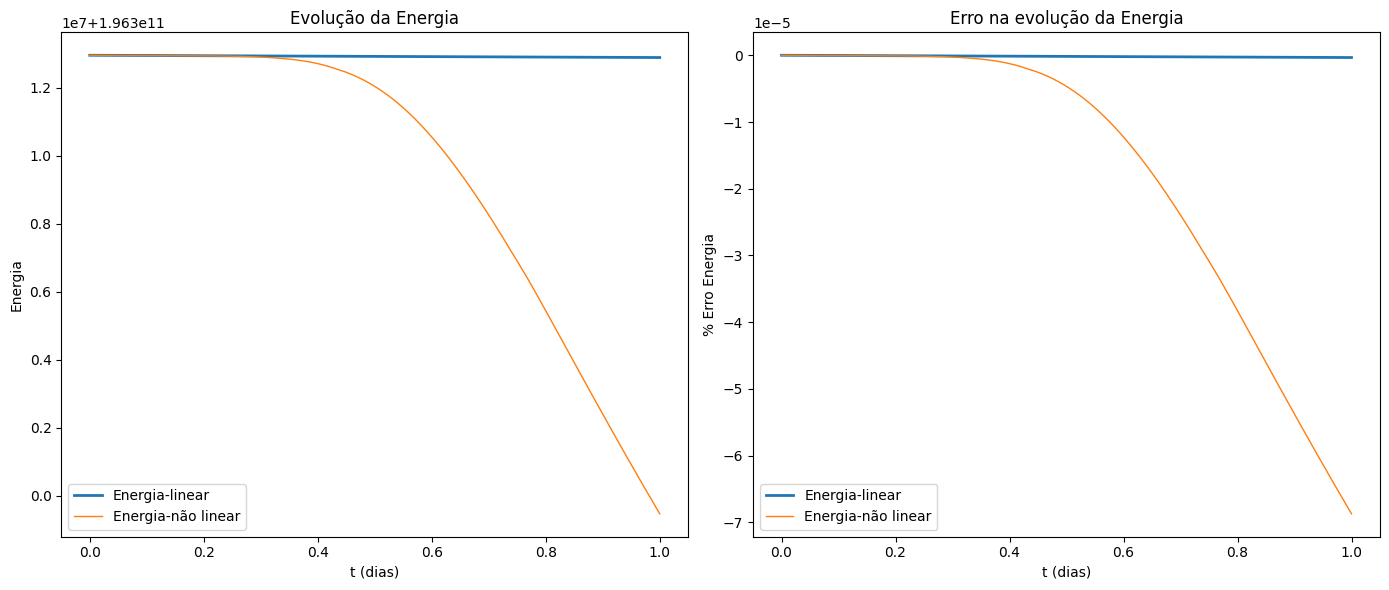

In [ ]:
tdia = 60*60*24

fig, axs = plt.subplots(1, 2, figsize=(14,6))


axs[0].set_title("Evolução da Energia")
axs[0].plot(dom.t/tdia, E_lin, label="Energia-linear", linewidth=2)
axs[0].plot(dom.t/tdia, E_nlin, label="Energia-não linear", linewidth=1)
axs[0].set_xlabel("t (dias)")
axs[0].set_ylabel("Energia")
axs[0].legend()

axs[1].set_title("Erro na evolução da Energia")
axs[1].plot(dom.t/tdia, (E_lin-E_lin[0])/E_lin[0], label="Energia-linear", linewidth=2)
axs[1].plot(dom.t/tdia, (E_nlin-E_nlin[0])/E_nlin[0], label="Energia-não linear", linewidth=1)
axs[1].set_xlabel("t (dias)")
axs[1].set_ylabel("% Erro Energia")
axs[1].legend()

fig.tight_layout()
plt.show()

O método não deveria conservar energia!!!?!?!?!

Dentro de um passo de tempo, ele conserva, mas o integrador temporal não conserva. Logo, ele conserva energia na ordem de precisão do método de integração temporal!

In [ ]:
#Convergência no tempo - energia
g = 9.8
hbar = 10000.0
f = 7.292e-05
wave_speed = np.sqrt(g*hbar)

dt_list = [960, 480, 240, 120, 60]
tab = PrettyTable(["Dx (km)", "Dt (min)", "Courant", "Erro Energia (%)"])
for dt in dt_list:
  #dx=(dt/60)*2*np.pi*erad/400
  dx = 2*np.pi*erad/100
  c = wave_speed*dt/dx
  dom = Dominio(t0=0.0, T=60*60*24, a=0.0, b=2*np.pi*erad, dt=dt, dx=dx)

  prob = SWE_1D(hbar = hbar, f = f, g = g, ini =2, dom = dom)
  u, v, h = rk33mpas(dom, prob, tend_nao_lin)
  E_nlin = np.zeros((dom.n+1))
  for k in range(dom.n+1):
    E_nlin_tmp = 0.5*(h[:, k]*(bar_x(u[:, k]*u[:, k], "u")+v[:, k]*v[:, k])+ prob.g*(h[:, k]*h[:, k] ))
    E_nlin[k] = np.sum(E_nlin_tmp, axis=0)
  erro_energia = (E_nlin[-1] - E_nlin[0])/E_nlin[0]
  tab.add_row([dx/1000, dt/60, c, erro_energia ])

print(tab)

+--------------------+----------+---------------------+-------------------------+
|      Dx (km)       | Dt (min) |       Courant       |     Erro Energia (%)    |
+--------------------+----------+---------------------+-------------------------+
| 400.31555892808717 |   16.0   |  0.7507265942415159 | -0.00029319128123423695 |
| 400.31555892808717 |   8.0    | 0.37536329712075794 |  -7.642221872732382e-05 |
| 400.31555892808717 |   4.0    | 0.18768164856037897 | -1.1446269015300513e-05 |
| 400.31555892808717 |   2.0    | 0.09384082428018949 | -1.4238057112217957e-06 |
| 400.31555892808717 |   1.0    | 0.04692041214009474 |  -1.637214959754615e-07 |
+--------------------+----------+---------------------+-------------------------+


#### 🧩 Enstrofia

A equação de Água Rasa conserva também a **Enstrofia**, isto é, a integral do quadrado da vorticidade potencial:
$$
Z(t)=\frac{1}{2}\int_{a}^{b}(q(x,t))^2 \, dx
$$

Numericamente, a enstrofia local vai "morar" no mesmo local da vorticidade, então, podemos calcular a enstrofia  como sendo:
$$
\tilde{Z}(t)=\frac{1}{2}\sum q^2\overline{h}^x.
$$

Em Sadourny 1975 é sugerido um método que conserva Enstrofia, com apenas pequenas modificações do método que conserva Energia, que implementamos acima.

(Como estamos em 1D, tudo que se refere a média ou diferenças em $y$ deve ser ignorado)


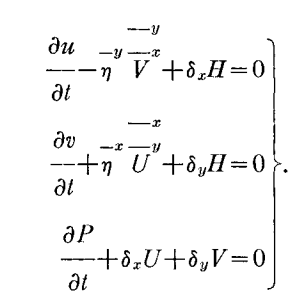


Na nossa notação temos:
>$$ \frac{\partial h }{\partial t} = - \delta_x  ( \overline h^x u) $$
$$ \frac{\partial u}{\partial t}   =  q\overline{hv}^x  - \delta_xH,$$
$$ \frac{\partial v}{\partial t} = - \overline{q}^x \overline{\overline{h}^x u}^x .$$

onde só mudamos a forma de cálculo do termo de vorticidade da equação para $v$.


In [ ]:
# Versão que conserva enstrofia!!!
def tend_nao_lin_ens(u, v, h, dom, prob): # Lado direito da equação - método numérico!


  #Tendencia em h
  # -- igual ao nosso método de Advecção mas agora com notação compacta!
  #--------------------
  F = bar_x(h, "h")*u
  htend = - del_x(F, "u")/dom.dx

  #Tendencia em u
  #--------------------
  K = (bar_x(u*u, "u")+v*v)/2.0
  H = prob.g*(h + prob.eta_b) + K
  q = (del_x(v, "v")/dom.dx + prob.f)/bar_x(h, "h")
  utend = q*bar_x(h*v, "h") - del_x(H, "h")/ dom.dx


  #Tendencia em v
  #--------------------
  vtend = - bar_x(q)*bar_x(bar_x(h, "h") * u, "u")

  return utend, vtend, htend

Para esse problemas 1D, as diferenças entre o método que conserva energia e enstrofia são mínimas.

🧩 Faça experimentos entre os dois métodos, que conserva energia e enstrofia, e verifique potenciais diferenças/similaridades nos resultados numéricos.

## ❗Exercício ❗

Suponha que queremos usar um modelo de água rasa com resolução de $30$ km em cada célula, em um domínio 1D de tamanho $2\pi a$, onde $a$ é o raio da Terra. Queremos rodar um modelo de água rasa por um dia (86400 segundos), sendo que o fluido tem altura média $\bar{h}=10$ km e está sujeito a uma aceleração da gravidade de $g=9.8$ m/s.

1. Estime, teoricamente, qual seria o maior $\Delta t$ que você poderia usar de forma a respeitar a condição de CFL. Use que as ondas mais rápidas do sistema de águas rasas são as ondas de gravidade, com velocidade $\sqrt{g\bar{h}}$, onde $g$ é a constante de aceleração da gravidade e $\bar{h}$ é a altura média do fluido.
2. Experimente rodar numericamente o modelo com este $\Delta t$ e com $\Delta t$s um pouco menores. Verifique se o método está estável em cada caso (se o valor da solução explode - por exemplo olhando se  a variação da solução depois de 1 dia é pequena ou grande). Você pode usar diferentes condições inicial para decidir isso.
3. Com base nos dois itens acima, decida qual $\Delta t$ você considera adequado para ser usado nesse modelo.



---



Resolução: